# <font color='blue'>OVERVIEW 

#### 1. Using H2o AutoML, we will forecast the Ladder score of the countries.

#### 2. In order to determine how accurate forecasting models are, we will first train the model and then run the AutoML.

#### 3. Then, determine which variables are having an impact on the prediction mode.

#### 4. Finally, determine whether the variables are related and then order them according to importance.

# <font color='blue'>PROBLEM STATEMENT

#### In this Notebook we are going to predict the Ladder score of the countries using H2O AutoML. Different models will be created and we will see which all predictor variables are important for making the forecast.

# <font color='blue'>DATASET DESCRIPTION 

This list includes both countries and dependent territories. Data based on the latest United Nations Population Division estimates.
Click on the name of the country or dependency for current estimates (live population clock), historical data, and projected figures.
See also: World Population

#### 
https://www.worldometers.info/world-population/population-by-country/


In [35]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [36]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
 import h2o

In [38]:
h2o.init() # initalize H2O

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         2 hours 0 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    24 days
H2O_cluster_name:           H2O_from_python_unknownUser_uhexe8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.005 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.16 final
--------------------------  ----------------------------------

In [39]:
from h2o.automl import H2OAutoML

In [40]:
from google.colab import drive

In [41]:
drive.mount('/content/drive') # connect drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
churn_df = h2o.import_file('/content/drive/MyDrive/Final_portfolio_piece/world-happiness-report-2022.csv') # import file from drive

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [43]:
churn_df.types

{'\ufeffCountry name': 'string',
 'Regional indicator': 'enum',
 'Ladder score': 'real',
 'Logged GDP per capita': 'real',
 'Social support': 'real',
 'Healthy life expectancy': 'real',
 'Freedom to make life choices': 'real',
 'Generosity': 'real',
 'Perceptions of corruption': 'real',
 'Ladder score in Dystopia': 'real',
 'Explained by: Log GDP per capita': 'real',
 'Explained by: Social support': 'real',
 'Explained by: Healthy life expectancy': 'real',
 'Explained by: Freedom to make life choices': 'real',
 'Explained by: Generosity': 'real',
 'Explained by: Perceptions of corruption': 'real',
 'Dystopia + residual': 'real'}

In [44]:
churn_df.describe() # describe dataset

Rows:149
Cols:17

﻿Country name    Regional indicator     Ladder score        Logged GDP per capita    Social support       Healthy life expectancy    Freedom to make life choices    Generosity             Perceptions of corruption    Ladder score in Dystopia    Explained by: Log GDP per capita    Explained by: Social support    Explained by: Healthy life expectancy    Explained by: Freedom to make life choices    Explained by: Generosity    Explained by: Perceptions of corruption    Dystopia + residual
-------  ---------------  ---------------------  ------------------  -----------------------  -------------------  -------------------------  ------------------------------  ---------------------  ---------------------------  --------------------------  ----------------------------------  ------------------------------  ---------------------------------------  --------------------------------------------  --------------------------  -----------------------------------------  ---------------------
type     string           enum                   real                real                     real                 real                       real                            real                   real                         real                        real                                real                            real                                     real                                          real                        real                                       real
mins     NaN                                     2.523               6.635                    0.463                48.478                     0.382                           -0.288                 0.082                        2.43                        0.0                                 0.0                             0.0                                      0.0                                           0.0                         0.0                                        0.648
mean     NaN                                     5.532838926174494   9.432208053691275        0.814744966442953    64.99279865771815          0.7915973154362418              -0.015134228187919449  0.7274496644295302           2.43                        0.9771610738255032                  0.7933154362416114              0.5201610738255033                       0.49871140939597314                           0.17804697986577186         0.1351409395973155                         2.4303288590604026
maxs     NaN                                     7.842               11.647                   0.983                76.953                     0.97                            0.542                  0.939                        2.43                        1.751                               1.172                           0.897                                    0.716                                         0.541                       0.547                                      3.482
sigma    NaN                                     1.0739235658235966  1.1586014476640745       0.11488902720653996  6.762043090404319          0.11333178506605261             0.15065670021779698    0.1792263191128035           0.0                         0.40473994098169525                 0.2588712527557973              0.2130190978341668                       0.13788838491066047                           0.09827033422549315         0.11436138902230591                        0.5376452090837567
zeros    0                                       0                   0                        0                    0                          0                               0                      0                            0                           1                                   1                               1                                        1                                             1                           1                                          0
missing  0                0                      0                   0

In [45]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15]) # Spliting the data for training

In [46]:
churn_train

﻿Country name    Regional indicator             Ladder score    Logged GDP per capita    Social support    Healthy life expectancy    Freedom to make life choices    Generosity    Perceptions of corruption    Ladder score in Dystopia    Explained by: Log GDP per capita    Explained by: Social support    Explained by: Healthy life expectancy    Explained by: Freedom to make life choices    Explained by: Generosity    Explained by: Perceptions of corruption    Dystopia + residual
---------------  ---------------------------  --------------  -----------------------  ----------------  -------------------------  ------------------------------  ------------  ---------------------------  --------------------------  ----------------------------------  ------------------------------  ---------------------------------------  --------------------------------------------  --------------------------  -----------------------------------------  ---------------------
Finland          Western Europe                        7.842                   10.775             0.954                     72                               0.949        -0.098                        0.186                        2.43                               1.446                           1.106                                    0.741                                         0.691                       0.124                                      0.481                  3.253
Switzerland      Western Europe                        7.571                   11.117             0.942                     74.4                             0.919         0.025                        0.292                        2.43                               1.566                           1.079                                    0.816                                         0.653                       0.204                                      0.413                  2.839
Iceland          Western Europe                        7.554                   10.878             0.983                     73                               0.955         0.16                         0.673                        2.43                               1.482                           1.172                                    0.772                                         0.698                       0.293                                      0.17                   2.967
Netherlands      Western Europe                        7.464                   10.932             0.942                     72.4                             0.913         0.175                        0.338                        2.43                               1.501                           1.079                                    0.753                                         0.647                       0.302                                      0.384                  2.798
Luxembourg       Western Europe                        7.324                   11.647             0.908                     72.6                             0.907        -0.034                        0.386                        2.43                               1.751                           1.003                                    0.76                                          0.639                       0.166                                      0.353                  2.653
New Zealand      North America and ANZ                 7.277                   10.643             0.948                     73.4                             0.929         0.134                        0.242                        2.43                               1.4                             1.094                                    0.785                                         0.665                       0.276                                      0.445                  2.612
Austria          Western Europe                        7.268                   10.906             0.934                     73.3        

In [47]:
y = "Ladder score" # Code written by me 
x = churn_df.columns
x.remove(y) # Dropping Ratings as this needs to be predicted.

In [48]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble"], verbosity="info", nfolds=0) # Drop Stacked Ensemble as this doesnot fit in our Model

In [49]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid) # Run AutoML

AutoML progress: |
02:06:08.242: Project: AutoML_3_20221218_20608
02:06:08.242: Cross-validation disabled by user: no fold column nor nfolds > 1.
02:06:08.242: Setting stopping tolerance adaptively based on the training frame: 0.05
02:06:08.242: Build control seed: 10
02:06:08.242: training frame: Frame key: AutoML_3_20221218_20608_training_py_1050_sid_aa8a    cols: 17    rows: 97  chunks: 1    size: 7178  checksum: -3667161497596043186
02:06:08.242: validation frame: Frame key: py_1052_sid_aa8a    cols: 17    rows: 25  chunks: 1    size: 4094  checksum: 5079065434445790776
02:06:08.242: leaderboard frame: Frame key: py_1052_sid_aa8a    cols: 17    rows: 25  chunks: 1    size: 4094  checksum: 5079065434445790776
02:06:08.242: blending frame: NULL
02:06:08.242: response column: Ladder score
02:06:08.242: fold column: null
02:06:08.242: weights column: null
02:06:08.256: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_3_20221218_20608


GLM Model: summary
    family    link      regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -------------------------------------------------
    gaussian  identity  Ridge ( lambda = 0.007952 )  nlambda = 30, lambda.max = 79.516, lambda.min = 0.007952, lambda.1se = -1.0  23                            23                             30                      AutoML_3_20221218_20608_training_py_1050_sid_aa8a

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 3.9954626952280385e-05
RMSE: 0.006320967248157547
MAE: 0.004885546812821752
RMSLE: 0.0011524446999120236
Mean Residual Deviance: 3.9954626952280385e-05
R^2: 0.9999627150127318
Null degrees of freedom: 96
Residual degrees of freedom: 73
Null deviance: 103.94529000371375
Residual deviance: 0.0038755988143711973
AIC: -657.1192337244797

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 9.745408776127576e-05
RMSE: 0.00987188369873125
MAE: 0.007824729317479715
RMSLE: 0.0017470156438006308
Mean Residual Deviance: 9.745408776127576e-05
R^2: 0.9999160175620874
Null degrees of freedom: 24
Residual degrees of freedom: 1
Null deviance: 29.442755612529094
Residual deviance: 0.002436352194031894
AIC: -109.95630298032566

Scoring History: 
     timestamp            duration    iteration    lambda    predictors    deviance_train          deviance_test           alpha    iterations    training_rmse         training_deviance       training_mae          training_r2         validation_rmse      validation_deviance    validation_mae        validation_r2
---  -------------------  ----------  -----------  --------  ------------  ----------------------  ----------------------  -------  ------------  --------------------  ----------------------  --------------------  ------------------  -------------------  ---------------------  --------------------  ------------------
     2022-12-18 02:06:08  0.000 sec   1            .8E2      24            0.9546254508225165      1.0479876783631956      0.0
     2022-12-18 02:06:08  0.001 sec   2            .58E2     24            0.916700053024529       1.0062728422962761      0.0
     2022-12-18 02:06:08  0.002 sec   3            .42E2     24            0.8689144483962606      0.9539549955663033      0.0
     2022-12-18 02:06:08  0.004 sec   4            .31E2     24            0.8103734529438662      0.8902731138174949      0.0
     2022-12-18 02:06:08  0.004 sec   5            .22E2     24            0.7410786697789413      0.8155336804267591      0.0      5             0.006320967248157547  3.9954626952280385e-05  0.004885546812821752  0.9999627150127318  0.00987188369873125  9.745408776127576e-05  0.007824729317479715  0.9999160175620874
     2022-12-18 02:06:08  0.005 sec   6            .16E2     24            0.6624328600714247      0.7316430583643087      0.0
     2022-12-18 02:06:08  0.005 sec   7            .12E2     24            0.5773661956806284      0.6420850474749962      0.0
     2022-12-18 02:06:08  0.006 sec   8            .86E1     24            0.4901666107009275      0.5516887254121151      0.0
     2022-12-18 02:06:08  0.006 sec   9            .63E1     24            0.4056621974616402      0.46544317087505716     0.0
     2022-12-18 02:06:08  0.007 sec   10           .46E1     24            0.3278315959638752      0.3869701246598376      0.0
---  ---                  ---         ---          ---       ---           ---                     ---                     ---      ---           ---                   -

In [50]:
lb = aml.leaderboard

In [51]:
lb.head()

model_id                                 rmse          mse         mae       rmsle    mean_residual_deviance
---------------------------------  ----------  -----------  ----------  ----------  ------------------------
GLM_1_AutoML_3_20221218_20608      0.00987188  9.74541e-05  0.00782473  0.00174702               9.74541e-05
XGBoost_3_AutoML_3_20221218_20608  0.246362    0.0606941    0.193894    0.0423534                0.0606941
GBM_4_AutoML_3_20221218_20608      0.270011    0.0729058    0.205282    0.0501719                0.0729058
GBM_2_AutoML_3_20221218_20608      0.308078    0.0949118    0.2462      0.0567341                0.0949118
GBM_3_AutoML_3_20221218_20608      0.313937    0.0985565    0.236125    0.0581916                0.0985565
GBM_5_AutoML_3_20221218_20608      0.315263    0.0993909    0.235298    0.056112                 0.0993909
XGBoost_1_AutoML_3_20221218_20608  0.316075    0.0999032    0.254111    0.0574112                0.0999032
XGBoost_2_AutoML_3_20221218_20608  0.36838     0.135704     0.252016    0.0669063                0.135704
DRF_1_AutoML_3_20221218_20608      0.414123    0.171498     0.329431    0.0722825                0.171498
XRT_1_AutoML_3_20221218_20608      0.438004    0.191848     0.318455    0.0785139                0.191848
[10 rows x 6 columns]

In [52]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [53]:
churn_pred.head() # code to predict accuracy

predict
---------
  7.61778
  7.39244
  7.18137
  7.10211
  7.08385
  7.06178
  6.36387
  6.32362
  6.31147
  6.03715
[10 rows x 1 column]

In [54]:
aml.leader.model_performance(churn_test) # drf model performance

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 7.054552427261307e-05
RMSE: 0.008399138305362822
MAE: 0.00700910566908041
RMSLE: 0.0013880084371332212
Mean Residual Deviance: 7.054552427261307e-05
R^2: 0.99994822787148
Null degrees of freedom: 26
Residual degrees of freedom: 3
Null deviance: 37.7829503828752
Residual deviance: 0.001904729155360553
AIC: -131.4771319057934

In [55]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0]) # leader board listing
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [56]:
model_ids # all models used in this case based on different parameters.

['GLM_1_AutoML_3_20221218_20608',
 'XGBoost_3_AutoML_3_20221218_20608',
 'GBM_4_AutoML_3_20221218_20608',
 'GBM_2_AutoML_3_20221218_20608',
 'GBM_3_AutoML_3_20221218_20608',
 'GBM_5_AutoML_3_20221218_20608',
 'XGBoost_1_AutoML_3_20221218_20608',
 'XGBoost_2_AutoML_3_20221218_20608',
 'DRF_1_AutoML_3_20221218_20608',
 'XRT_1_AutoML_3_20221218_20608']

In [57]:
h2o.get_model([mid for mid in model_ids if "DRF" in mid][0]) # Model details and comparing trained data and validated data to show scoring history

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20221218_20608


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          29057                  9            12           10.3143       50            71            61.4286

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1620501199087628
RMSE: 0.40255449309225555
MAE: 0.3113625026420577
RMSLE: 0.07001199320366447
Mean Residual Deviance: 0.1620501199087628

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.17149750321433677
RMSE: 0.41412257027882066
MAE: 0.32943146787370947
RMSLE: 0.07228246449365591
Mean Residual Deviance: 0.17149750321433677

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-12-18 02:06:09  0.001 sec   0                  nan              nan             nan                  nan                nan               nan
    2022-12-18 02:06:09  0.022 sec   5                  0.53543          0.44207         0.286685             0.435972           0.31964           0.190072
    2022-12-18 02:06:09  0.046 sec   10                 0.489821         0.387369        0.239924             0.434661           0.329508          0.18893
    2022-12-18 02:06:09  0.072 sec   15                 0.437439         0.351348        0.191353             0.426098           0.325992          0.181559
    2022-12-18 02:06:09  0.109 sec   20                 0.418186         0.326197        0.17488              0.423563           0.325626          0.179406
    2022-12-18 02:06:09  0.139 sec   25                 0.404749         0.310144        0.163822             0.429179           0.328613          0.184195
    2022-12-18 02:06:09  0.164 sec   30                 0.405044         0.315647        0.164061             0.430907           0.338727          0.185681
    2022-12-18 02:06:09  0.194 sec   35                 0.402554         0.311363        0.16205              0.414123           0.329431          0.171498

Variable Importances: 
variable                                    relative_importance    scaled_importance    percentage
------------------------------------------  ---------------------  -------------------  ------------
Logged GDP per capita                       709.947                1                    0.239123
Explained by: Log GDP per capita            493.937                0.695737             0.166367
Social support                              344.565                0.48534              0.116056
Dystopia + residual                         277.373                0.390695             0.0934241
Healthy life expectancy                     249.979                0.35211              0.0841975
Explained by: Healthy life expectancy       210.744                0.296845             0.0709825
Explained by: Social support                182.638                0.257256             0.0615157
Regional indicator                          163.76                 0.230666             0.0551574
Explained by: Freedom to make life choices  114.89                 0.161829             0.0386971
Freedom to make life choices                78.2051                0.110156             0.0263409
Perceptions of corruption                   49.1052                0.0691674            0.0165395
Explained by: Perceptions of corruption     40.416                 0.0569282            

In [58]:
out = h2o.get_model([mid for mid in model_ids if "DRF" in mid][0]) # DRF model details

In [59]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'DRF_1_AutoML_3_20221218_20608',
   'type': 'Key<Model>',
   'URL': '/3/Models/DRF_1_AutoML_3_20221218_20608'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221218_20608_training_py_1050_sid_aa8a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221218_20608_training_py_1050_sid_aa8a'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221218_20608_training_py_1050_sid_aa8a',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221218_20608_training_py_1050_sid_aa8a'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_

In [60]:
out

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_3_20221218_20608


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          29057                  9            12           10.3143       50            71            61.4286

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1620501199087628
RMSE: 0.40255449309225555
MAE: 0.3113625026420577
RMSLE: 0.07001199320366447
Mean Residual Deviance: 0.1620501199087628

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.17149750321433677
RMSE: 0.41412257027882066
MAE: 0.32943146787370947
RMSLE: 0.07228246449365591
Mean Residual Deviance: 0.17149750321433677

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2022-12-18 02:06:09  0.001 sec   0                  nan              nan             nan                  nan                nan               nan
    2022-12-18 02:06:09  0.022 sec   5                  0.53543          0.44207         0.286685             0.435972           0.31964           0.190072
    2022-12-18 02:06:09  0.046 sec   10                 0.489821         0.387369        0.239924             0.434661           0.329508          0.18893
    2022-12-18 02:06:09  0.072 sec   15                 0.437439         0.351348        0.191353             0.426098           0.325992          0.181559
    2022-12-18 02:06:09  0.109 sec   20                 0.418186         0.326197        0.17488              0.423563           0.325626          0.179406
    2022-12-18 02:06:09  0.139 sec   25                 0.404749         0.310144        0.163822             0.429179           0.328613          0.184195
    2022-12-18 02:06:09  0.164 sec   30                 0.405044         0.315647        0.164061             0.430907           0.338727          0.185681
    2022-12-18 02:06:09  0.194 sec   35                 0.402554         0.311363        0.16205              0.414123           0.329431          0.171498

Variable Importances: 
variable                                    relative_importance    scaled_importance    percentage
------------------------------------------  ---------------------  -------------------  ------------
Logged GDP per capita                       709.947                1                    0.239123
Explained by: Log GDP per capita            493.937                0.695737             0.166367
Social support                              344.565                0.48534              0.116056
Dystopia + residual                         277.373                0.390695             0.0934241
Healthy life expectancy                     249.979                0.35211              0.0841975
Explained by: Healthy life expectancy       210.744                0.296845             0.0709825
Explained by: Social support                182.638                0.257256             0.0615157
Regional indicator                          163.76                 0.230666             0.0551574
Explained by: Freedom to make life choices  114.89                 0.161829             0.0386971
Freedom to make life choices                78.2051                0.110156             0.0263409
Perceptions of corruption                   49.1052                0.0691674            0.0165395
Explained by: Perceptions of corruption     40.416                 0.0569282            

In [61]:
out_gbm = h2o.get_model([mid for mid in model_ids if "DRF" in mid][0]) #DRF model details

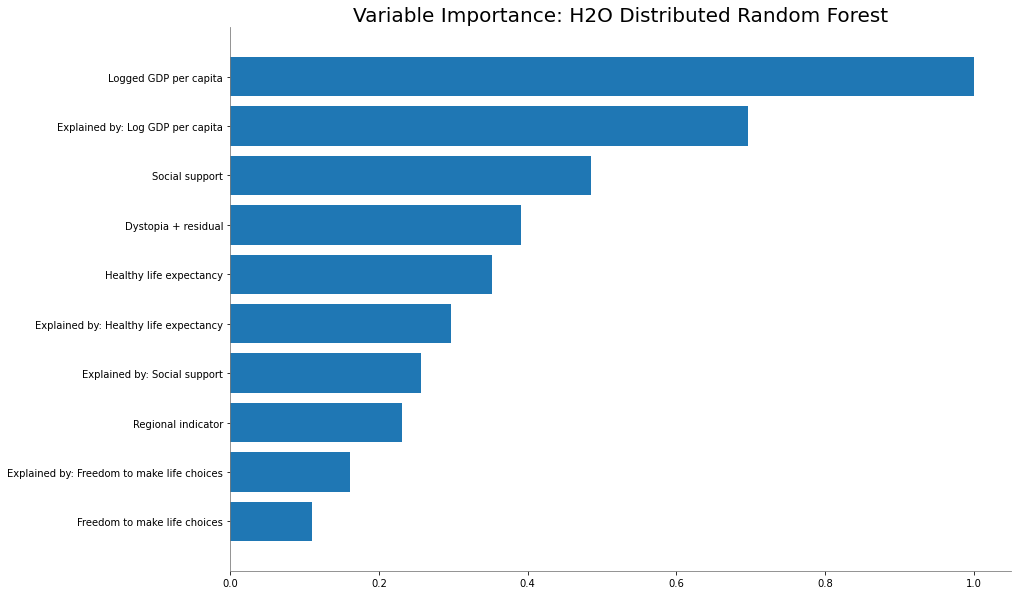

<Figure size 432x288 with 0 Axes>

In [62]:
out.varimp_plot() # Plotting bar chart to show which variable has the most importance

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ----------------------------------
H2O_cluster_uptime:         2 hours 0 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.38.0.3
H2O_cluster_version_age:    24 days
H2O_cluster_name:           H2O_from_python_unknownUser_uhexe8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.003 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.16 final
--------------------------  ----------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
02:06:17.967: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country name]


02:06:19.434: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country name]

█
02:06:19.957: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country name]
02:06:19.957: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 126.0.
02:06:19.959: _train param, Dropping unused columns: [Ladder score in Dystopia, ﻿Country name]
02:06:20.73: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country name]

█
02:06:21.793: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country name]

███
02:06:24.179: _train param, Dropping bad and constant columns: [Ladder score in Dystopia, ﻿Country na

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      rmse          mse         mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  ----------  -----------  ----------  -----------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_BestOfFamily_1_AutoML_4_20221218_20617  0.00430081  1.84969e-05  0.00358283  0.000727368               1.84969e-05                 107                   0.094425  StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_4_20221218_20617  0.00430081  1.84969e-05  0.00358283  0.000727368               1.84969e-05                 115                   0.091445  StackedEnsemble
GLM_1_AutoML_4_20221218_20617                           0.00441748  1.95142e-05  0.00365098  0.000751803               1.95142e-05                  43                   0.011992  GLM
StackedEnsemble_BestOfFamily_3_AutoML_4_20221218_20617  0.00457317  2.09139e-05  0.00393333  0.000768749               2.09139e-05                 111                   0.149418  StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_4_20221218_20617  0.0046329   2.14637e-05  0.00396979  0.000774466               2.14637e-05                 112                   0.15453   StackedEnsemble
GBM_grid_1_AutoML_4_20221218_20617_model_2              0.0361599   0.00130754   0.0283323   0.00556849                0.00130754                  236                   0.028473  GBM
GBM_grid_1_AutoML_4_20221218_20617_model_12             0.0389868   0.00151997   0.0283784   0.00557348                0.00151997                  281                   0.034136  GBM
GBM_4_AutoML_4_20221218_20617                           0.0480749   0.00231119   0.0360924   0.00701963                0.00231119                  255                   0.027281  GBM
GBM_2_AutoML_4_20221218_20617                           0.0515379   0.00265616   0.0356606   0.00776361                0.00265616                  340                   0.026288  GBM
GBM_5_AutoML_4_20221218_20617                           0.0523401   0.00273948   0.0379794   0.00845736                0.00273948                  426                   0.03678   GBM
GBM_3_AutoML_4_20221218_20617                           0.0659146   0.00434473   0.04819     0.0101259                 0.00434473                  253                   0.03018   GBM
XGBoost_grid_1_AutoML_4_20221218_20617_model_3          0.0696611   0.00485267   0.050709    0.0100674                 0.00485267                   73                   0.016121  XGBoost
DRF_1_AutoML_4_20221218_20617                           0.0791205   0.00626005   0.0594417   0.0130521                 0.00626005                  410                   0.034765  DRF
GBM_grid_1_AutoML_4_20221218_20617_model_9              0.0794159   0.00630689   0.0658253   0.0119745                 0.00630689                  142                   0.037     GBM
GBM_grid_1_AutoML_4_20221218_20617_model_3              0.0808178   0.00653151   0.066171    0.0126105                 0.00653151                  192                   0.036253  GBM
GBM_grid_1_AutoML_4_20221218_20617_model_7              0.0809408   0.00655141   0.0700139   0.0132948                 0.00655141                  120                   0.029326  GBM
XRT_1_AutoML_4_20221218_20617                           0.0816513   0.00666693   0.0614264   0.0127094                 0.00666693                  319                   0.031273  DRF
XGBoost_grid_1_AutoML_4_20221218_20617_model_4          0.0850387   0.00723158   0.0679017   0.0124478                 0.00723158                   92                   0.015548  XGBoost
GBM_grid_1_AutoML_4_20221218_20617_model_10             0.0859766   0.00739198   0.0693505   0.0128399                 0.00739198                  237                   0.030458  GBM
StackedEnsemble_AllModels_3_AutoML_4_20221218_20617     0.0864808   0.00747892   0.06688

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

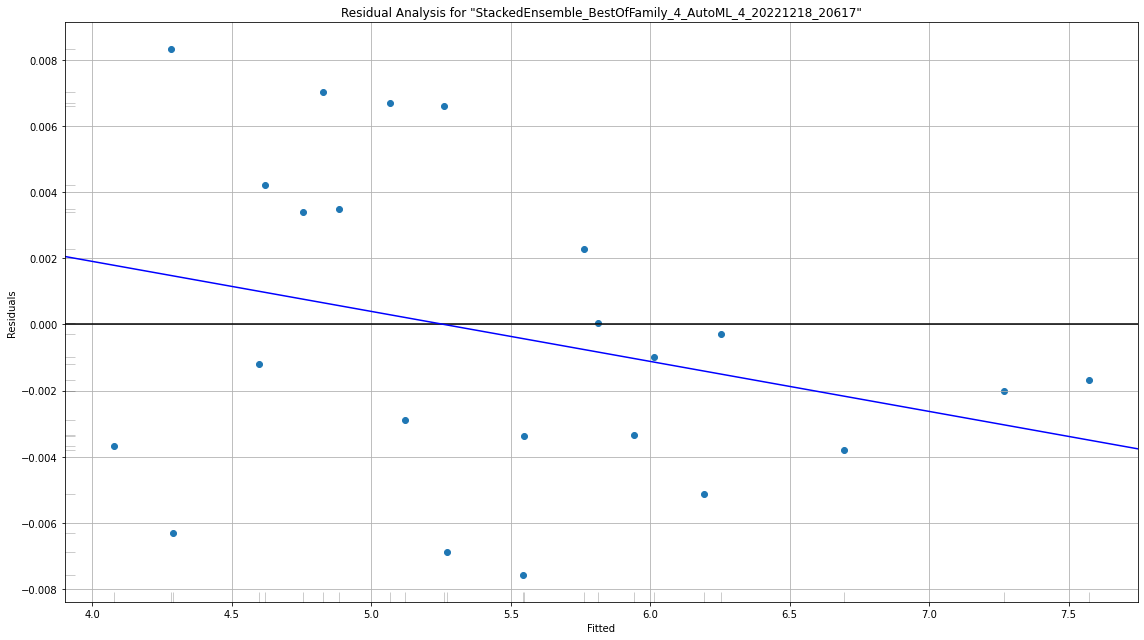

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

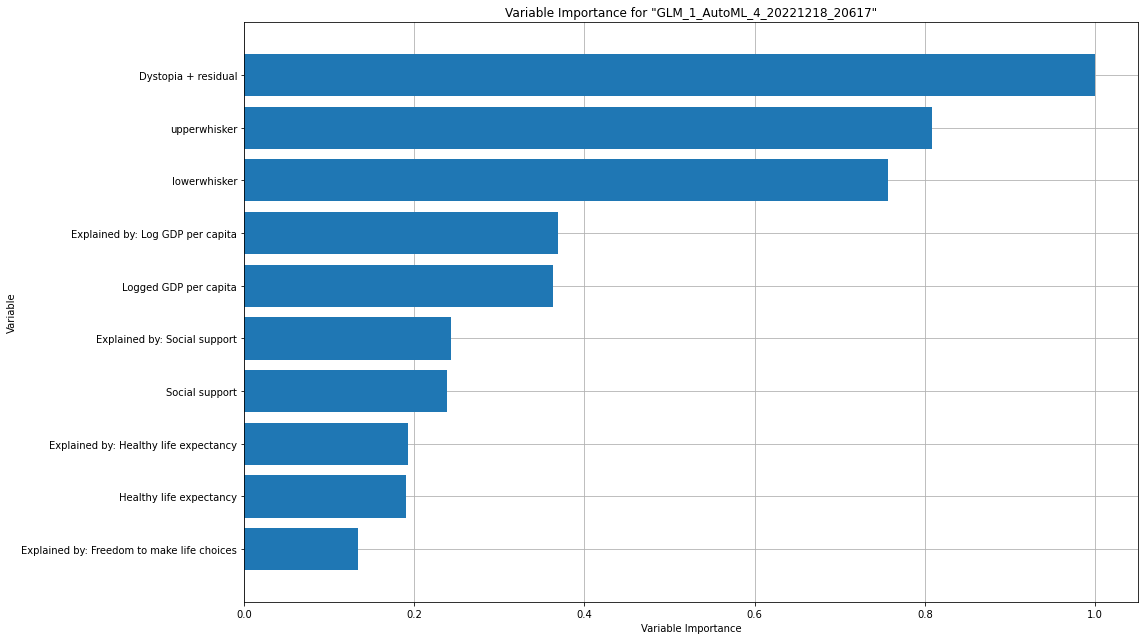

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

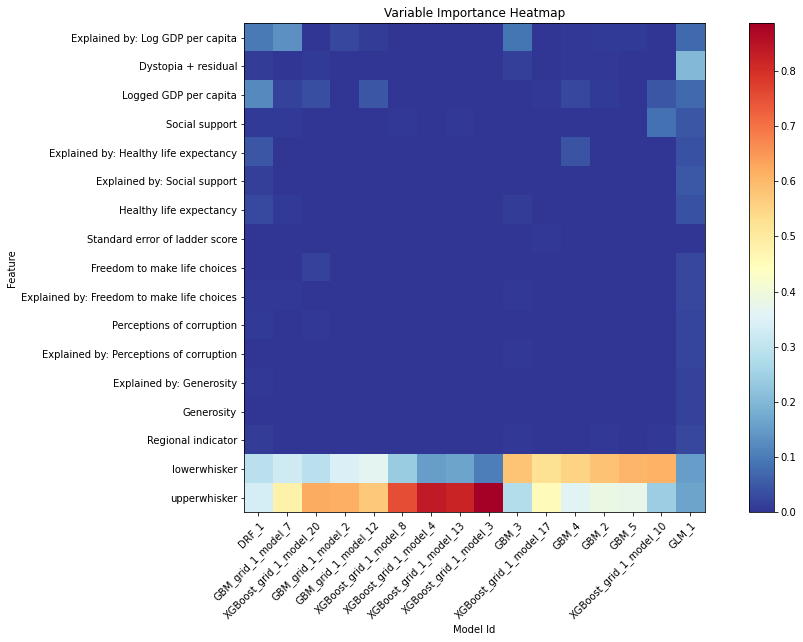

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

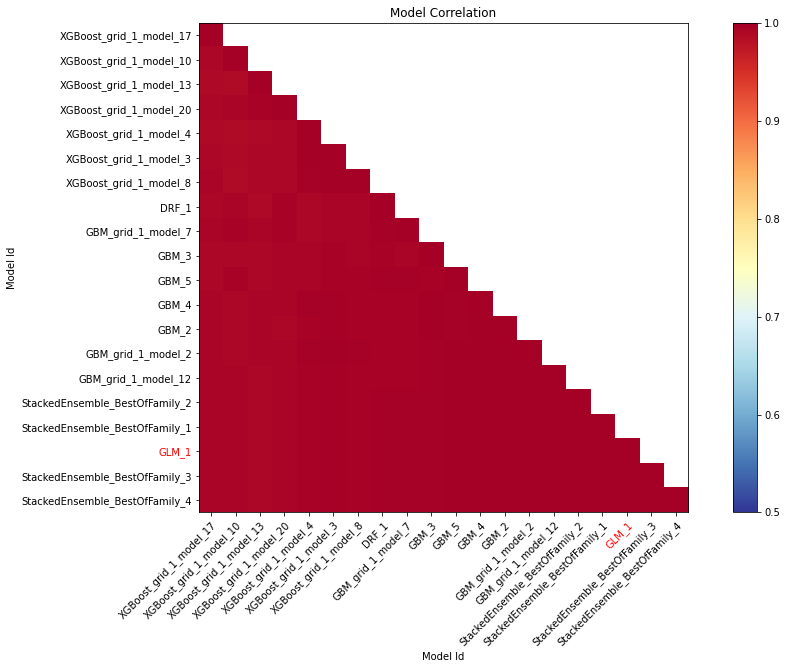

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

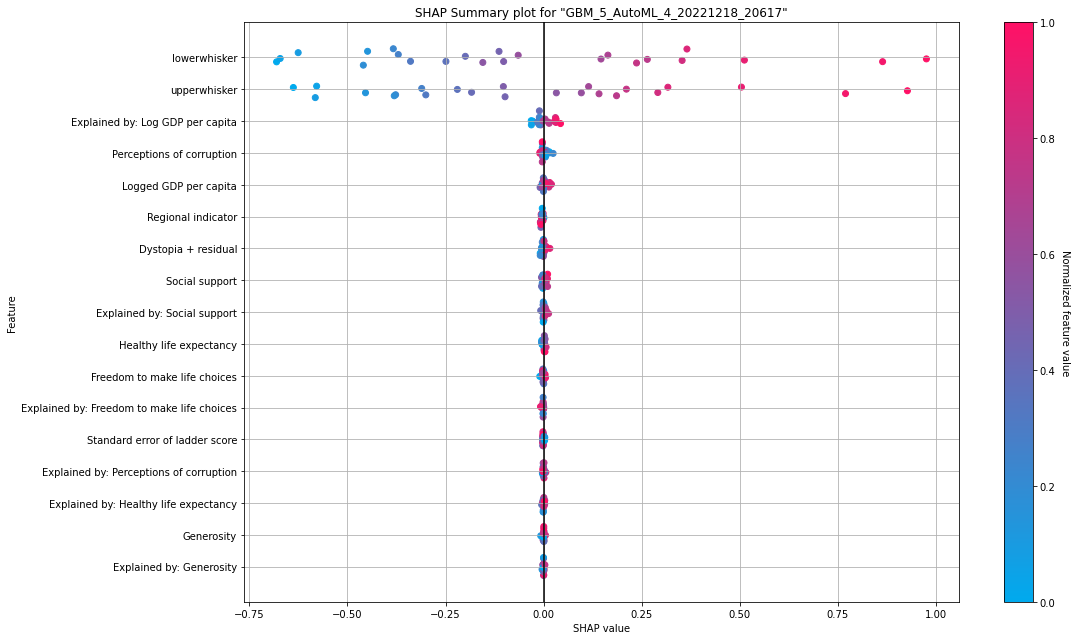

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

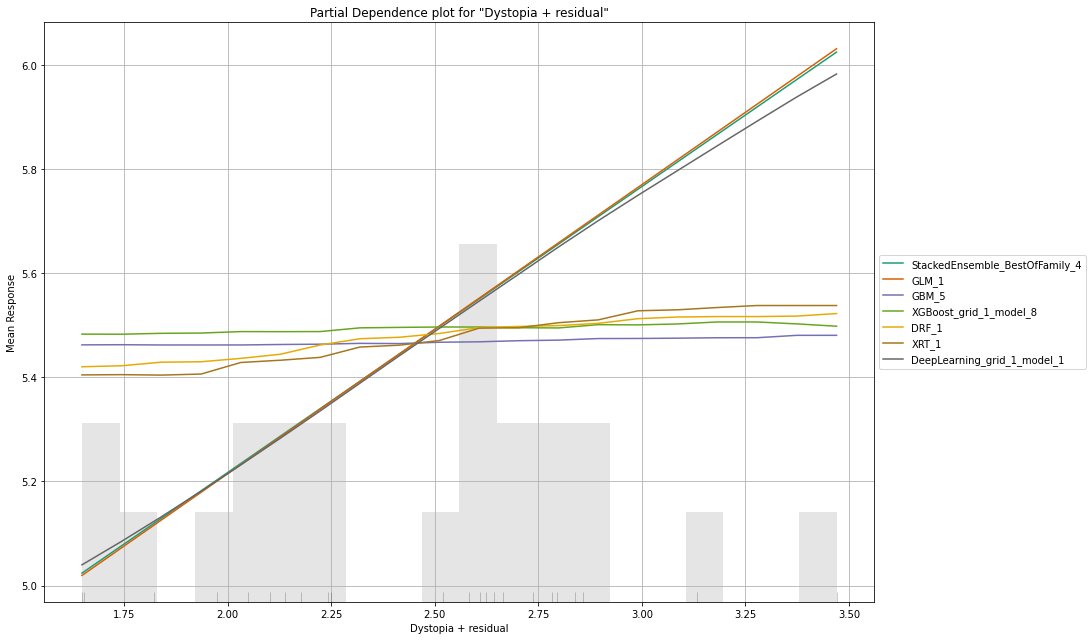

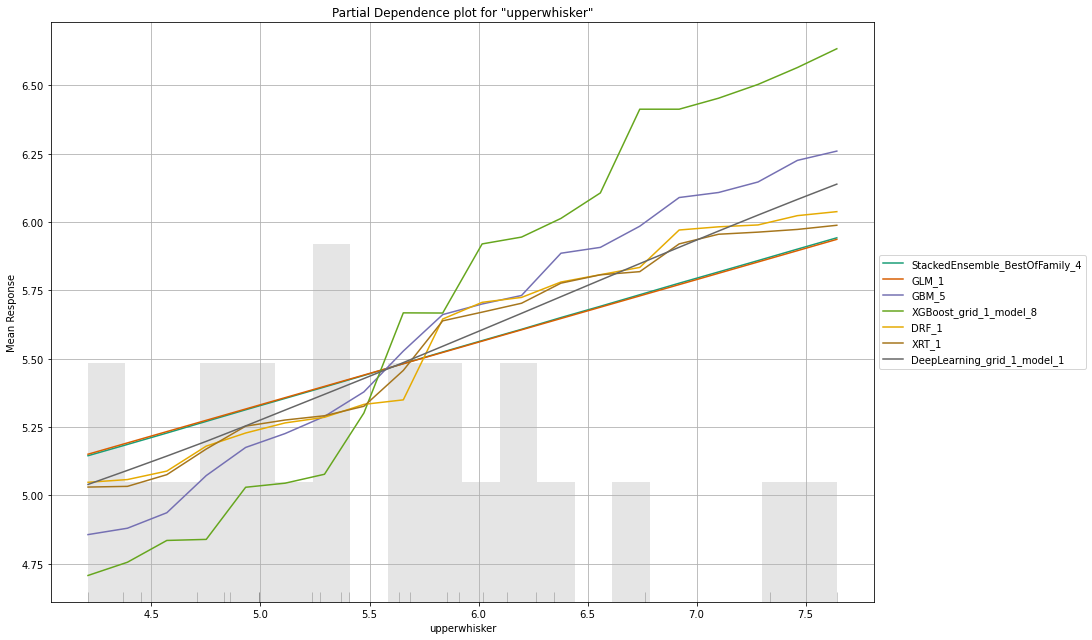

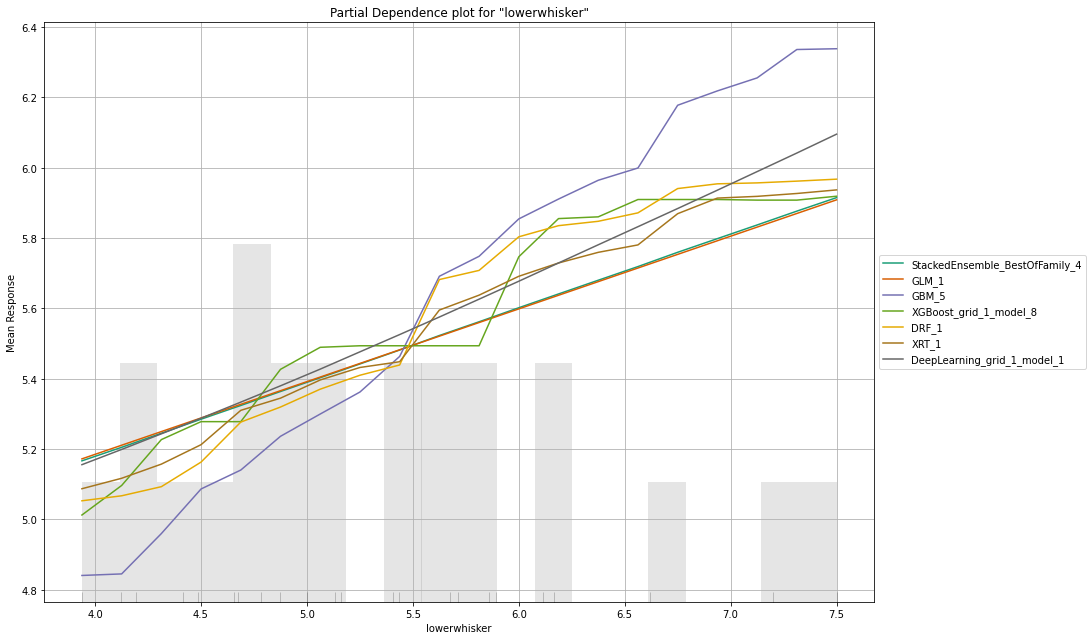

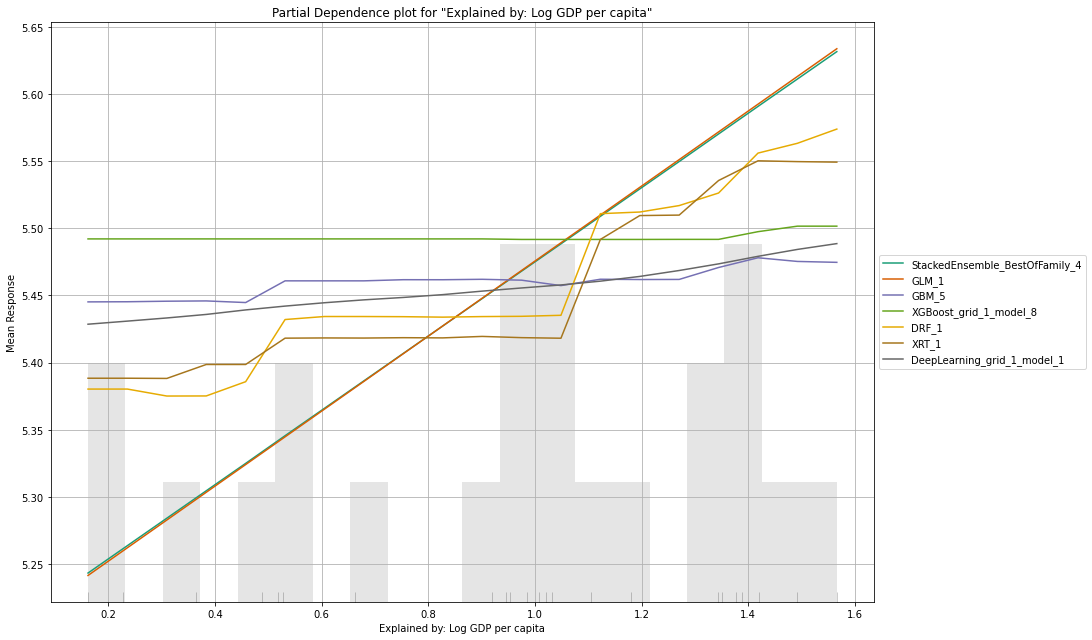

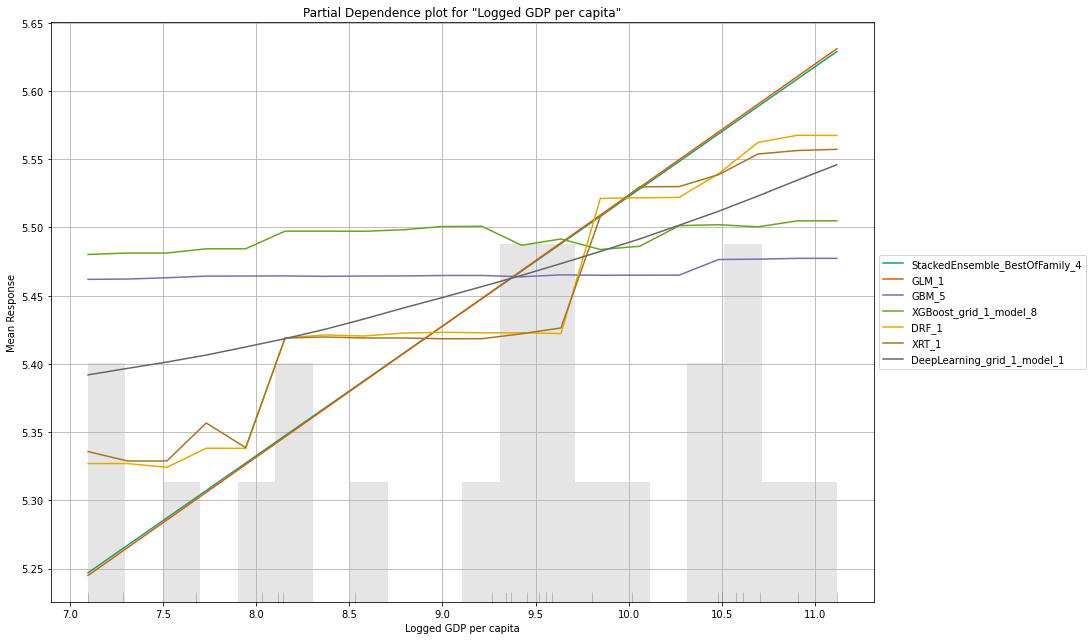

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

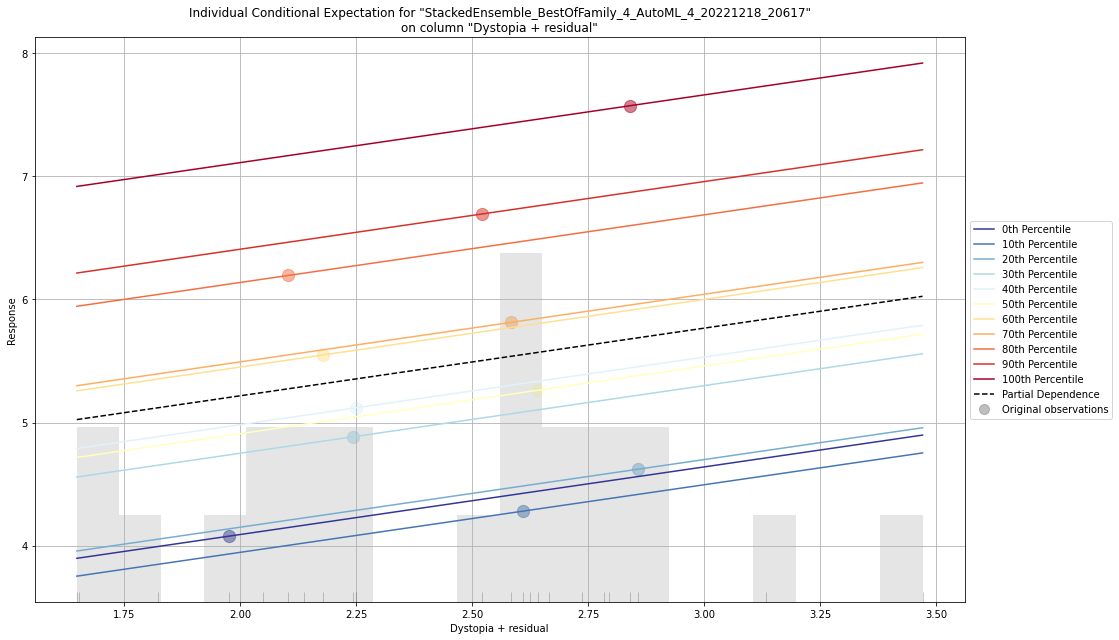

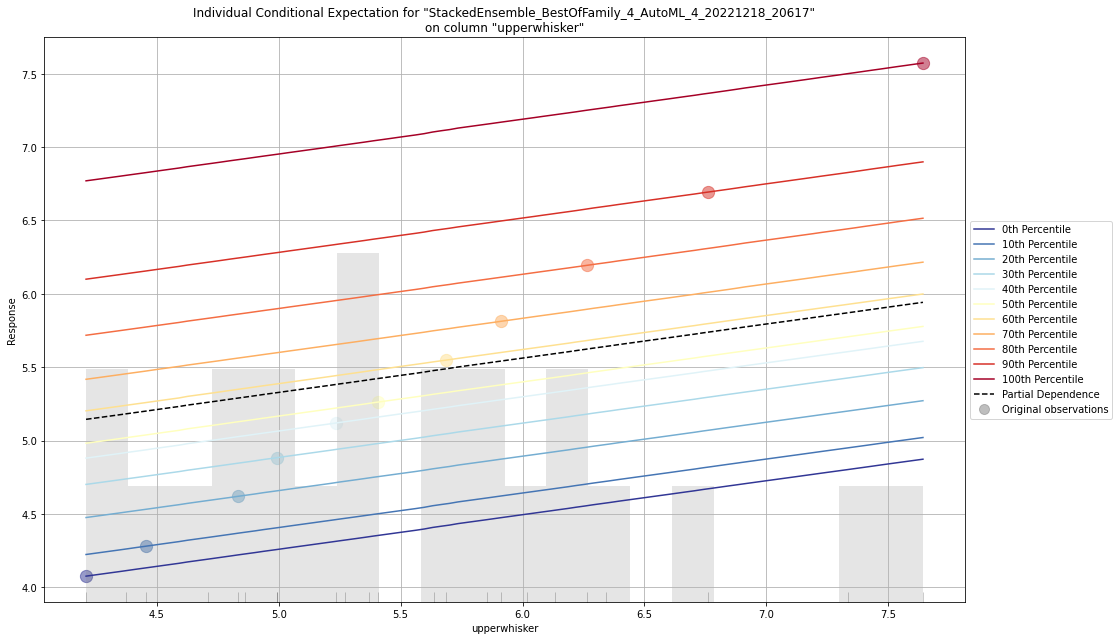

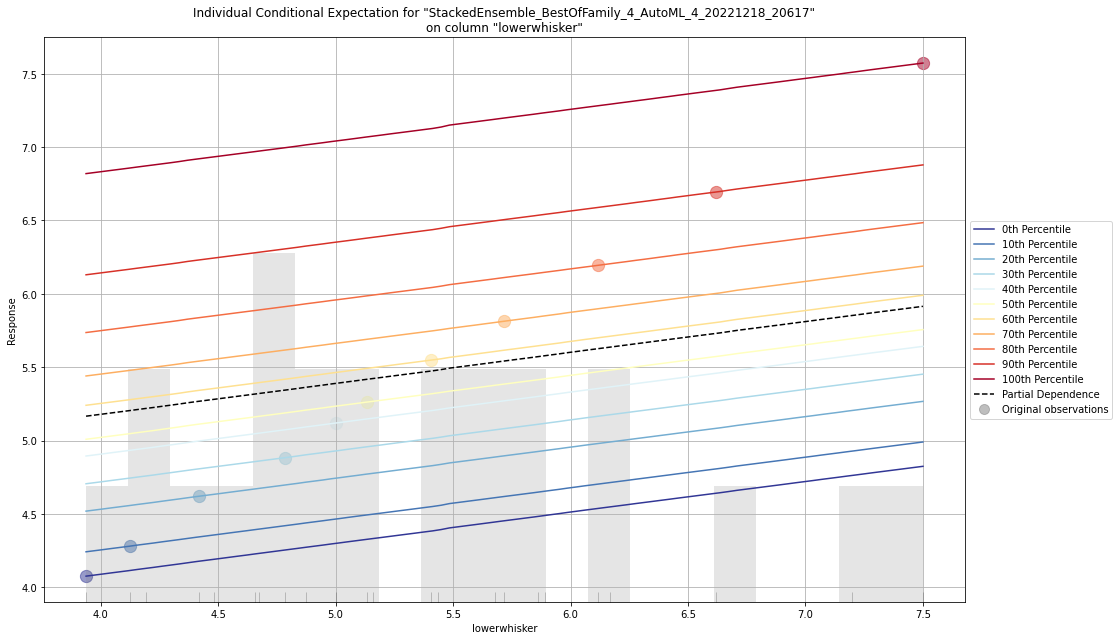

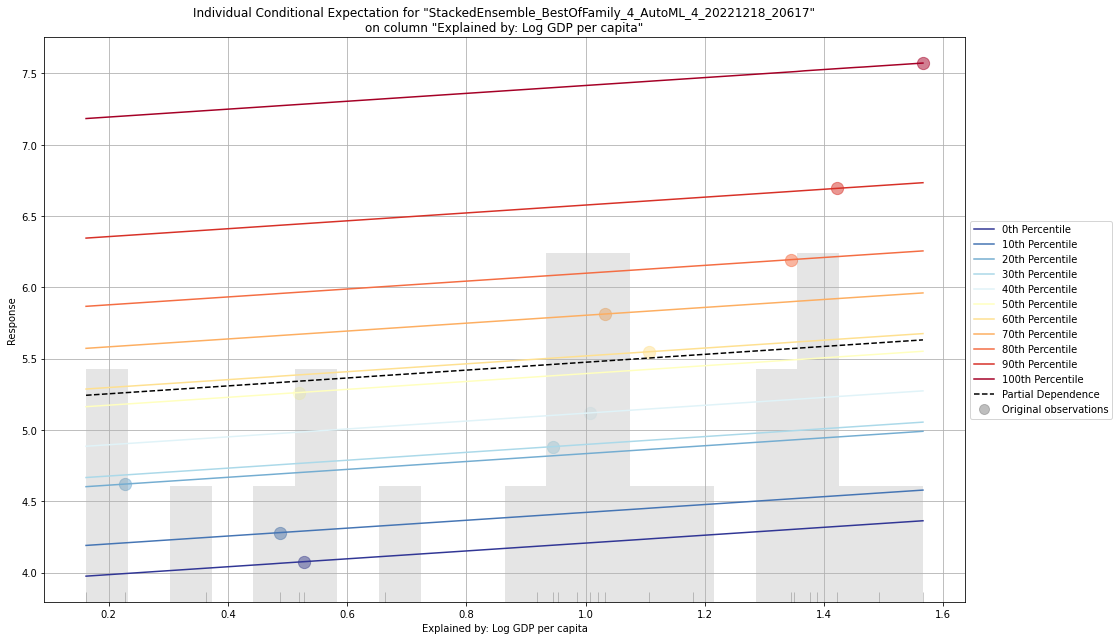

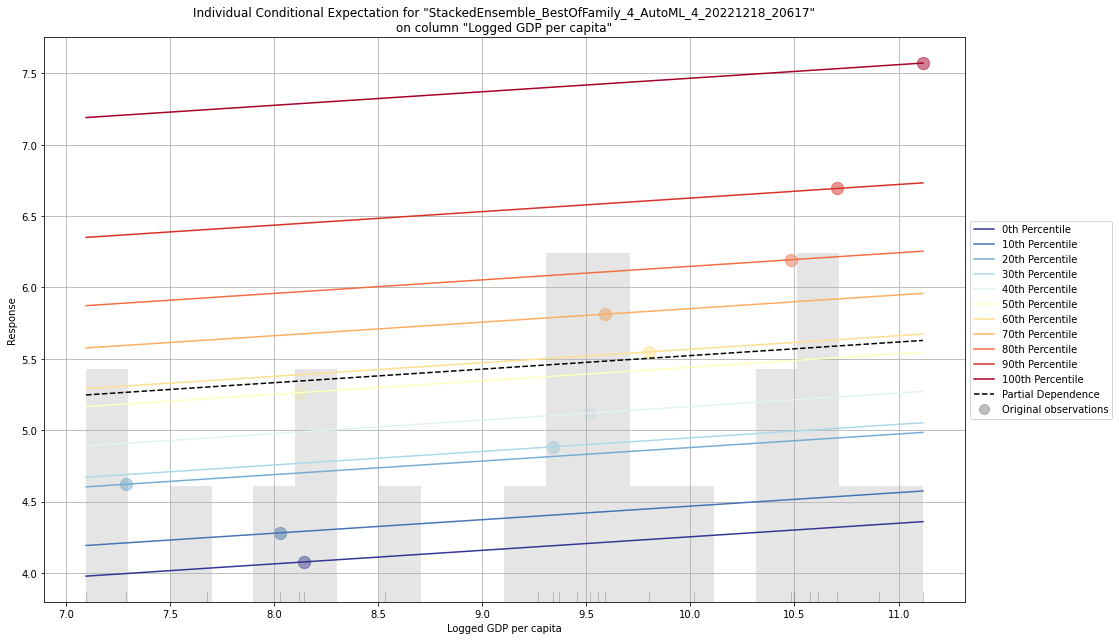

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

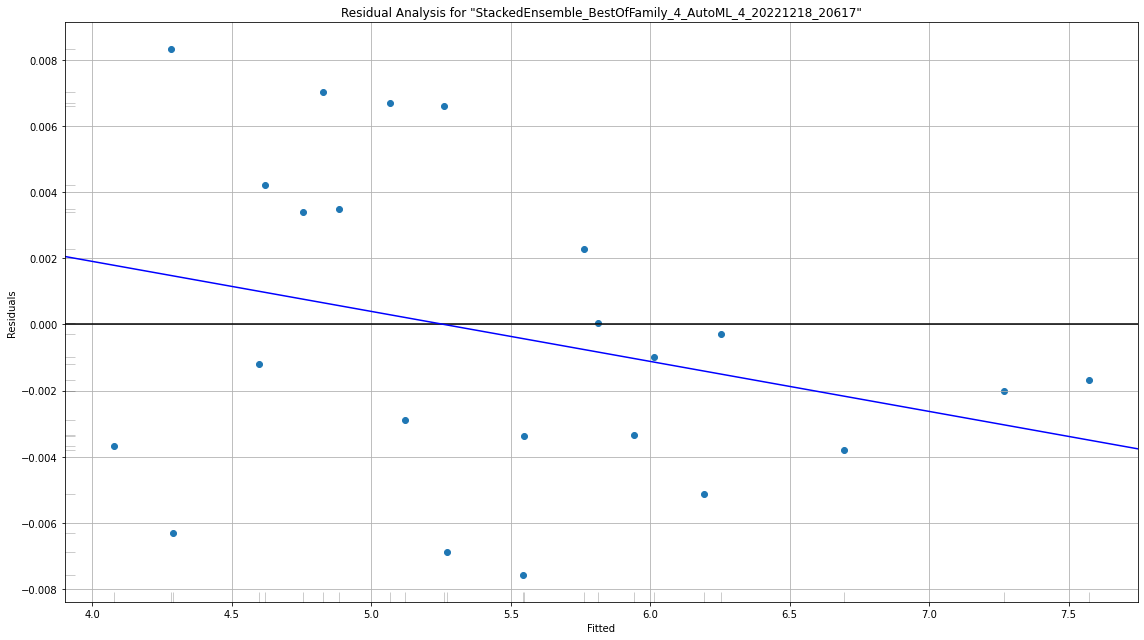

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

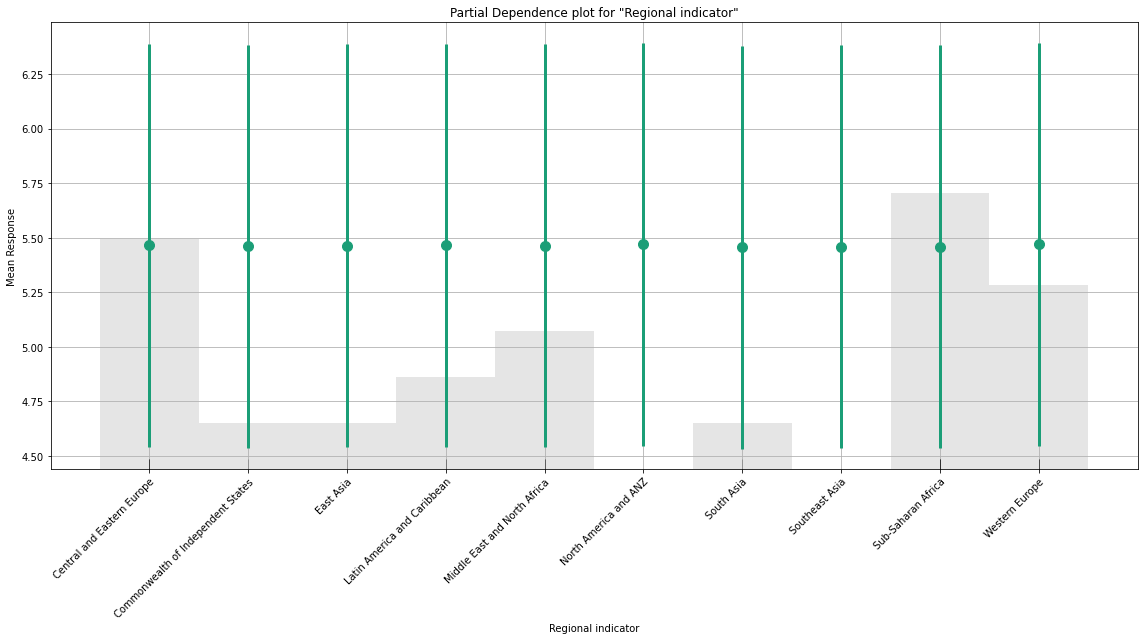

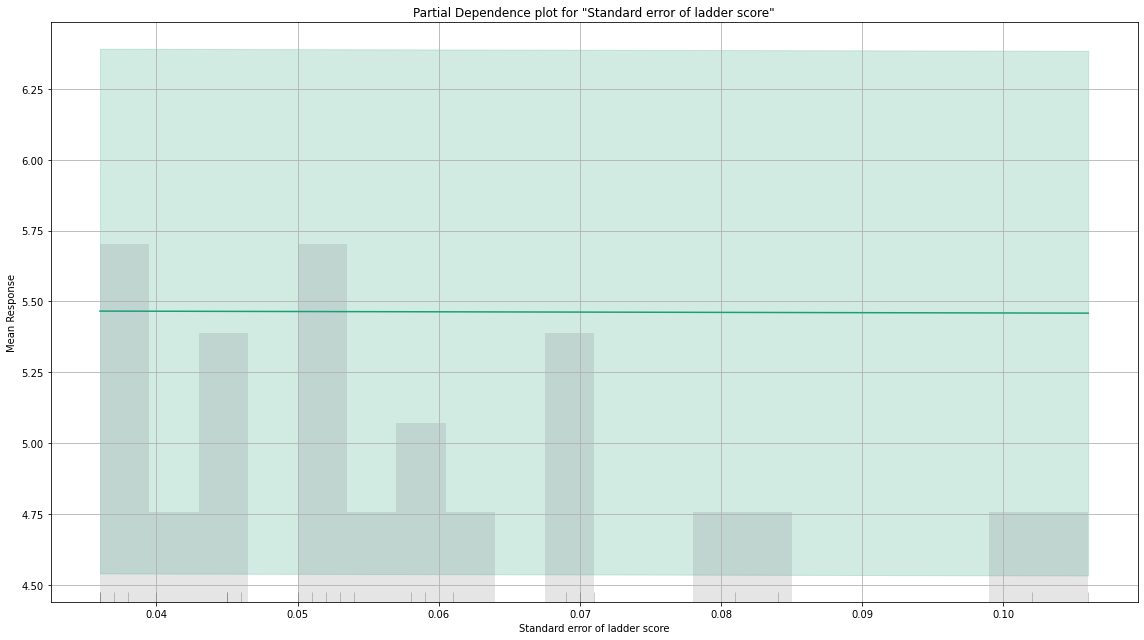

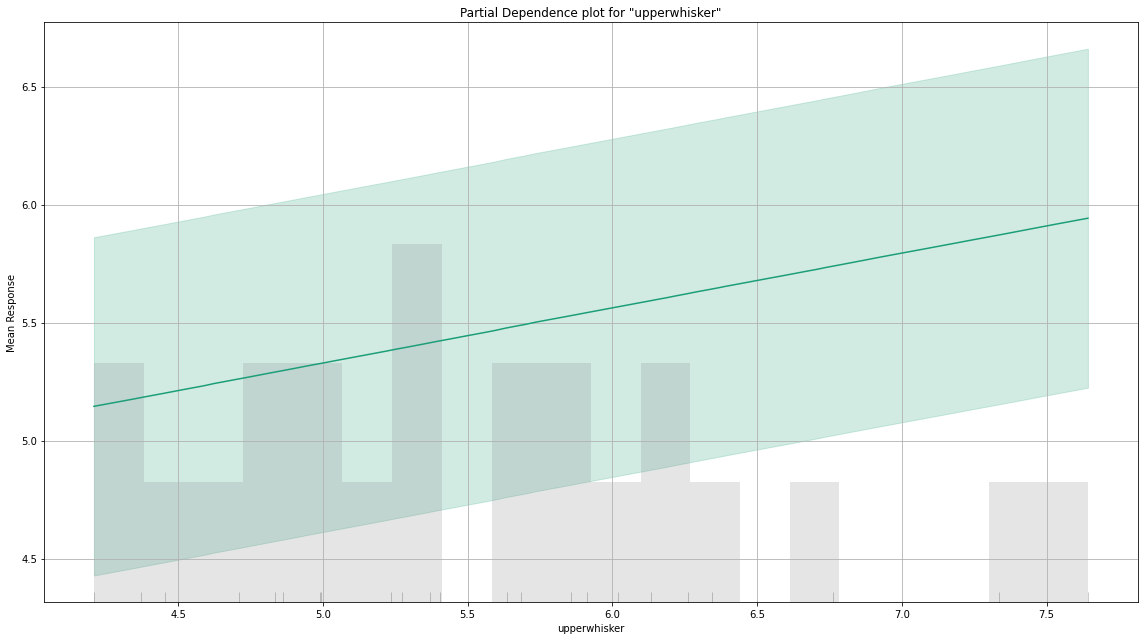

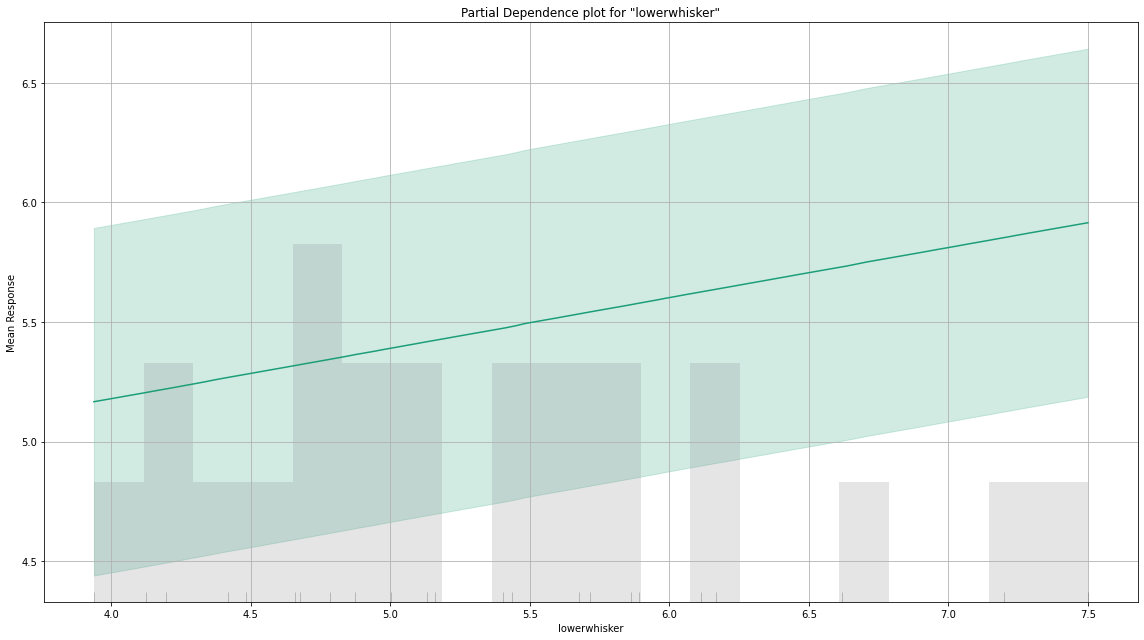

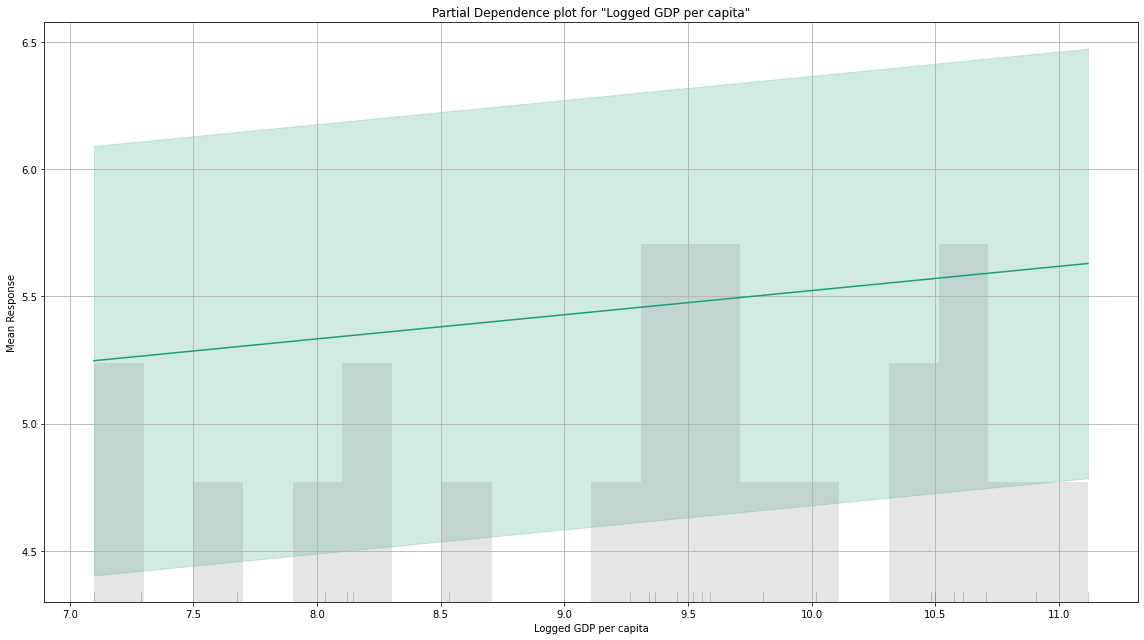

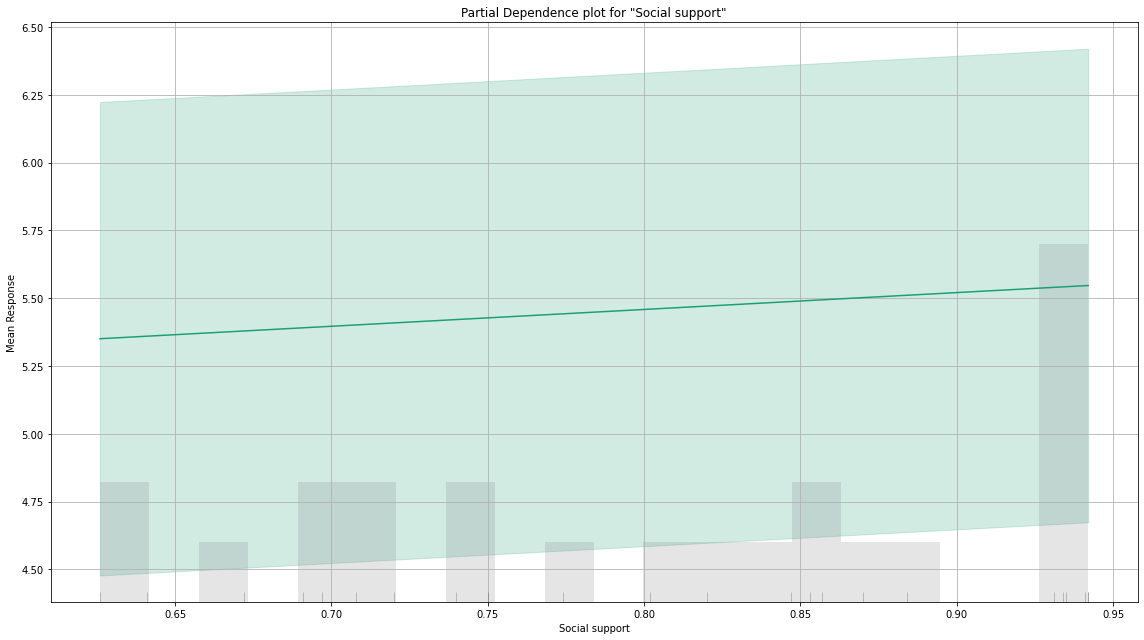

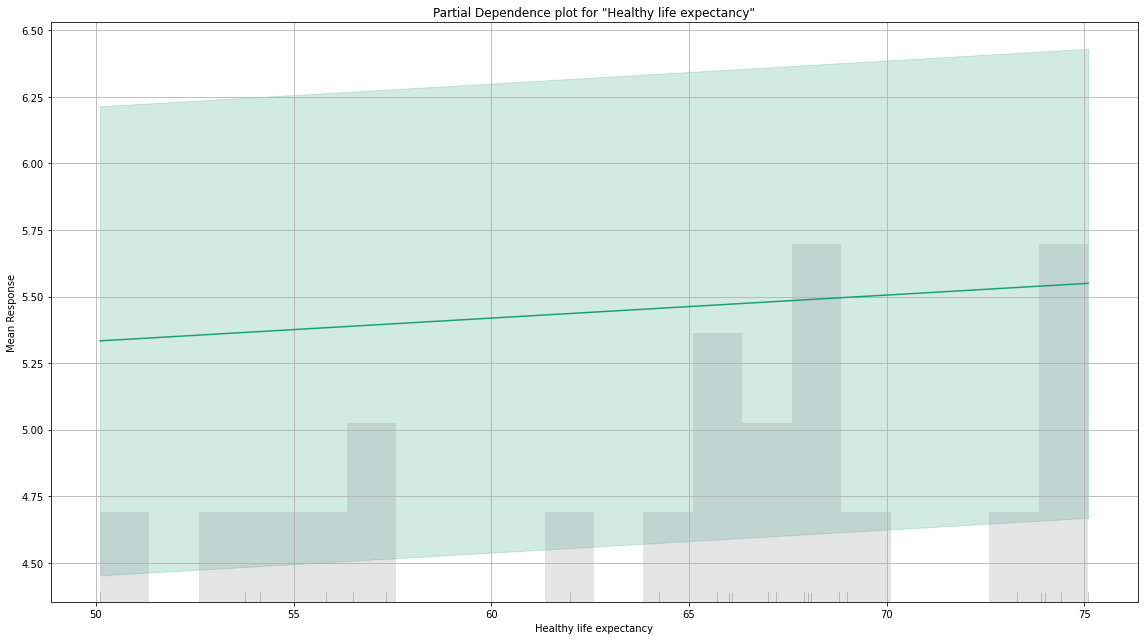

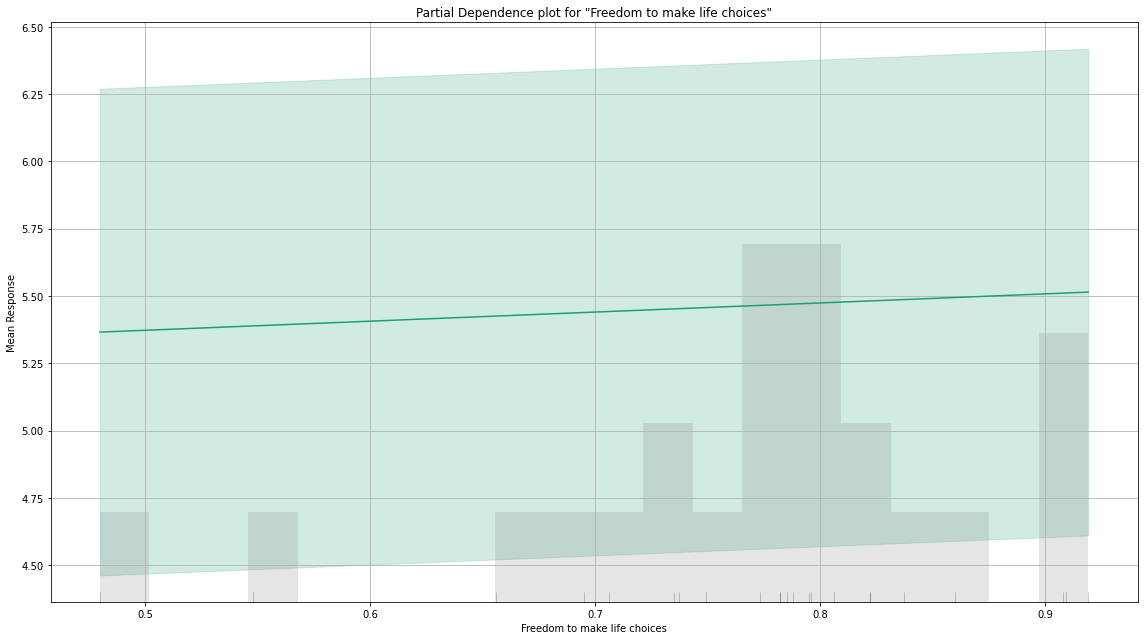

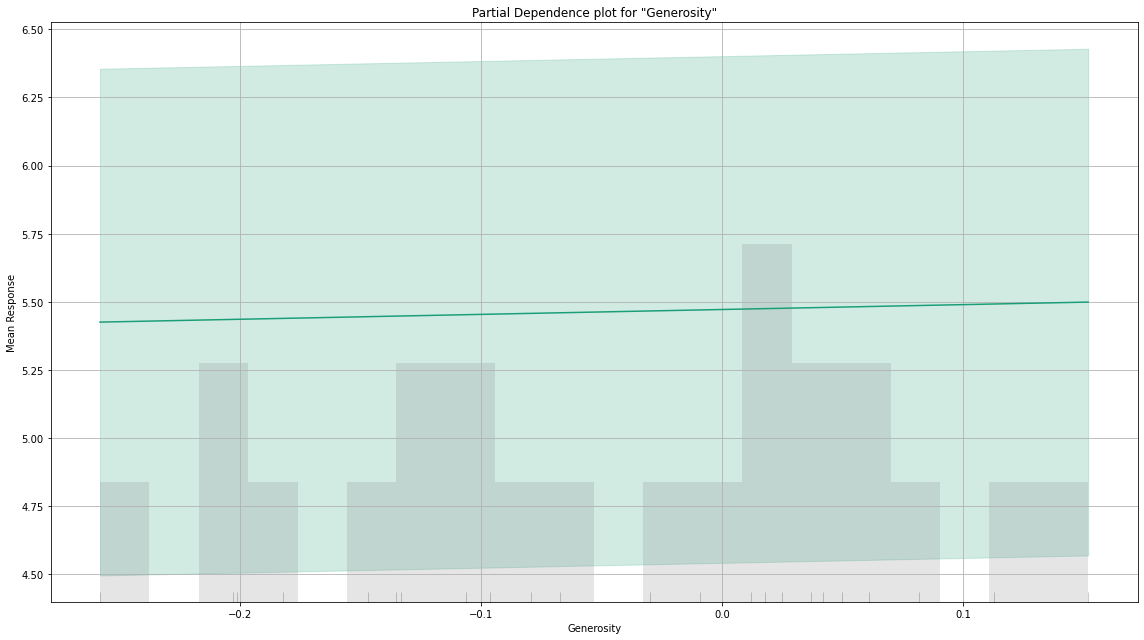

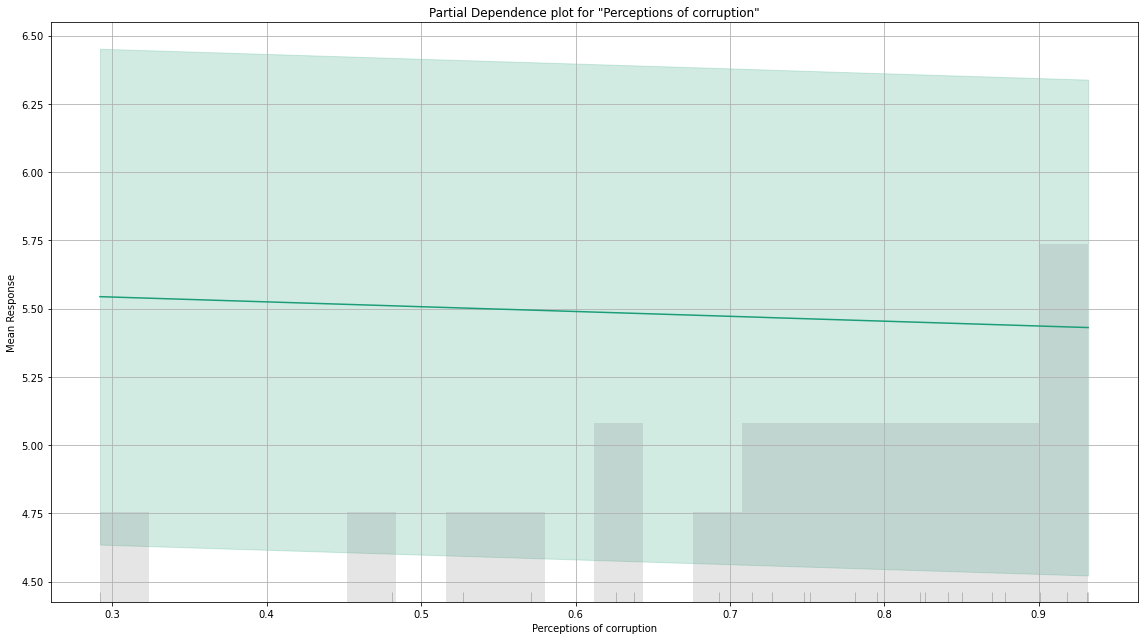

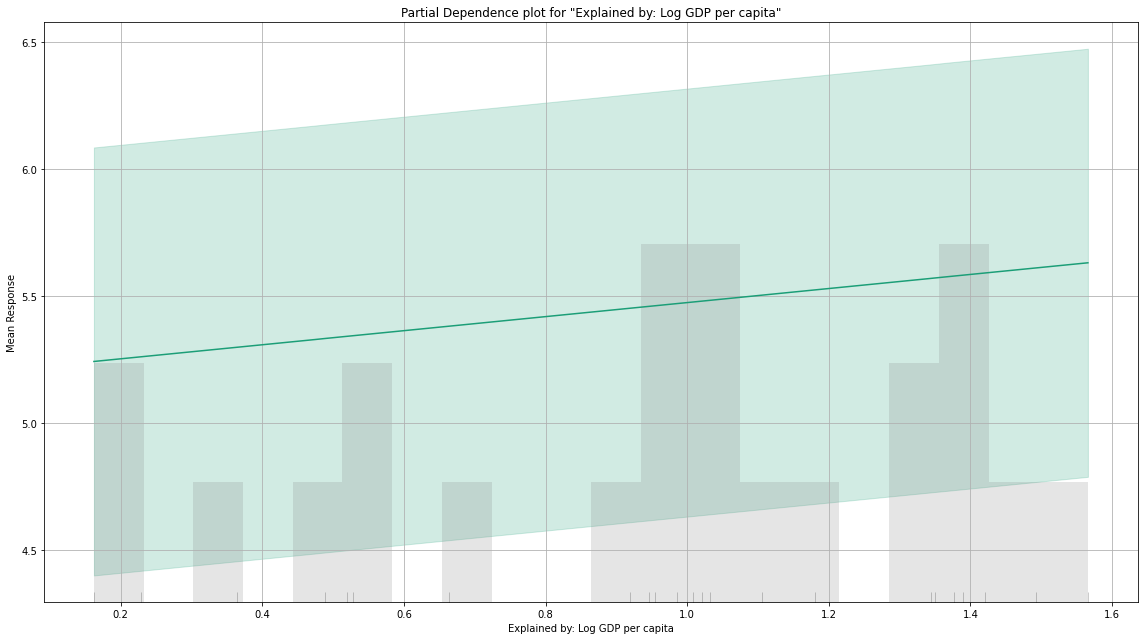

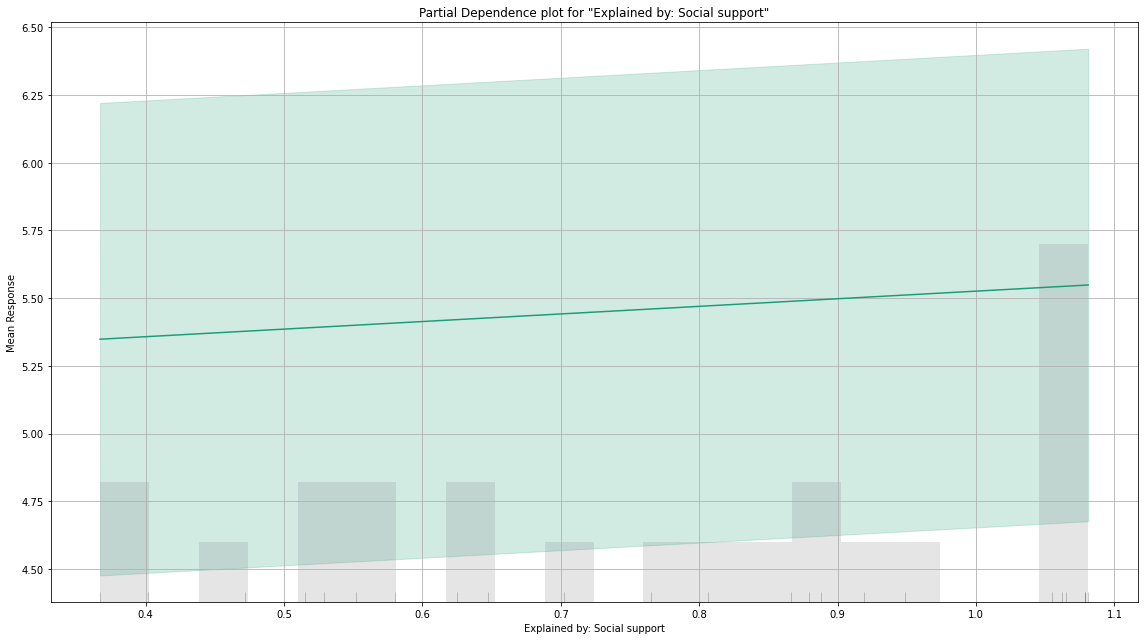

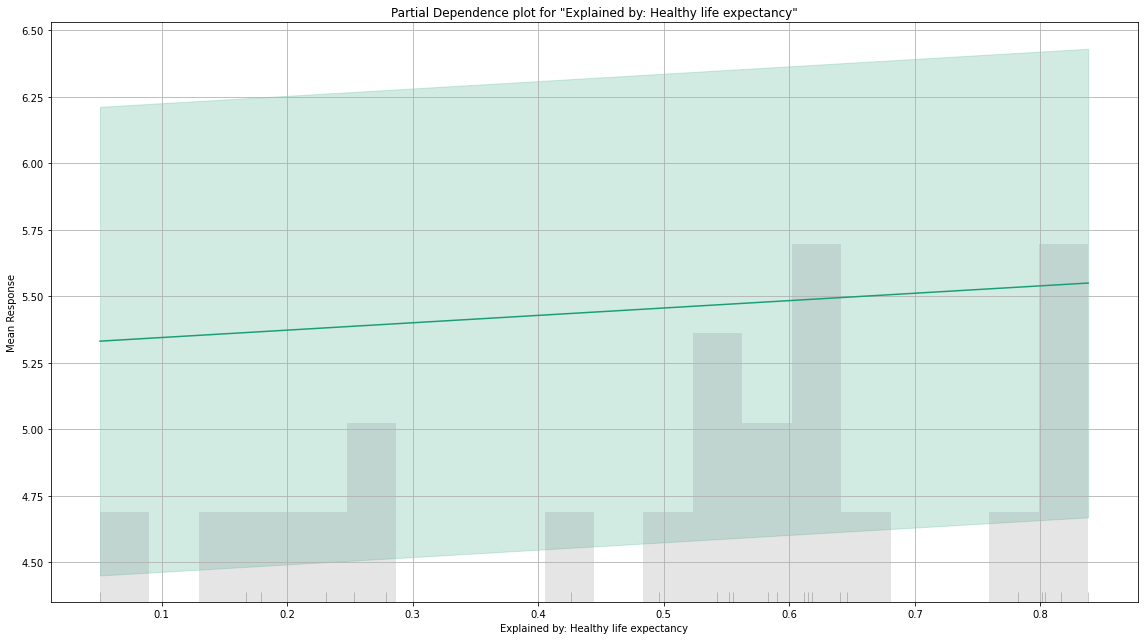

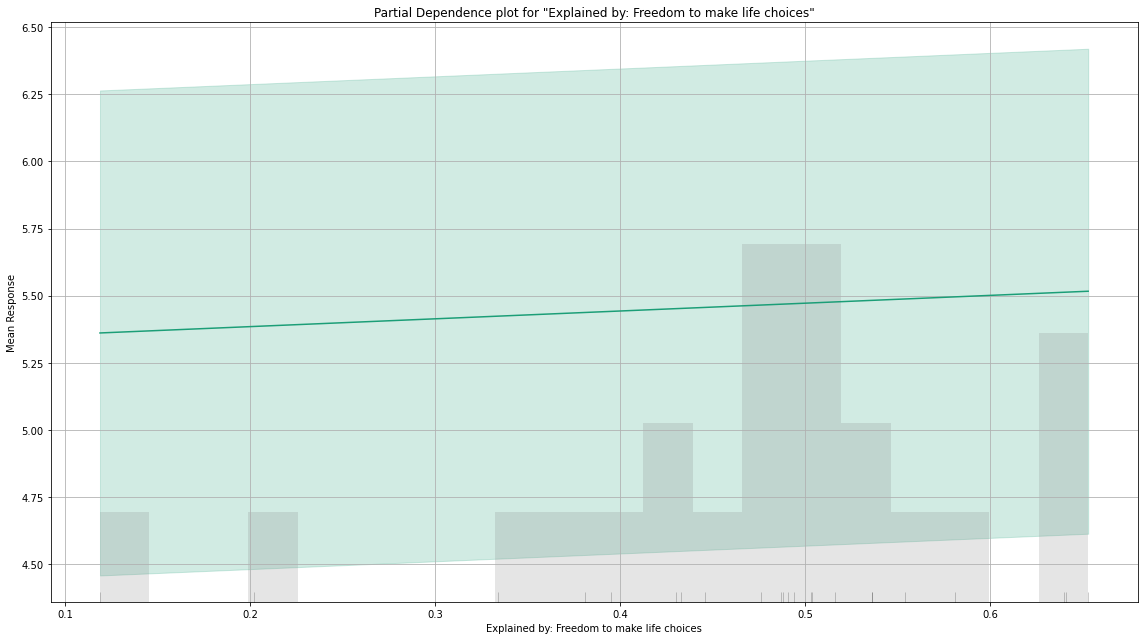

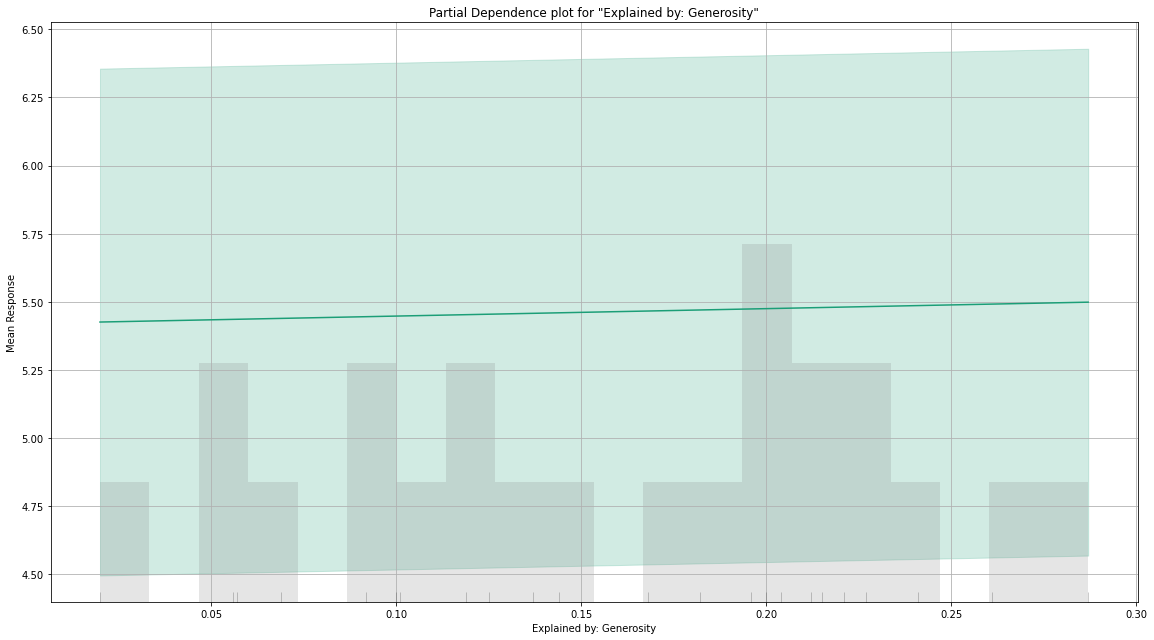

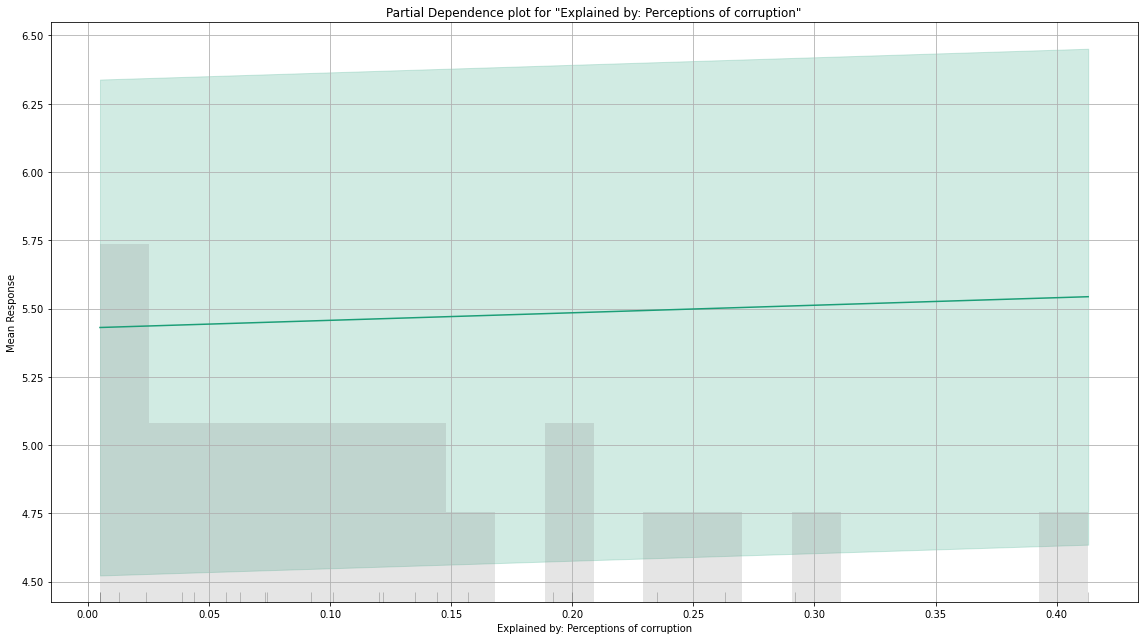

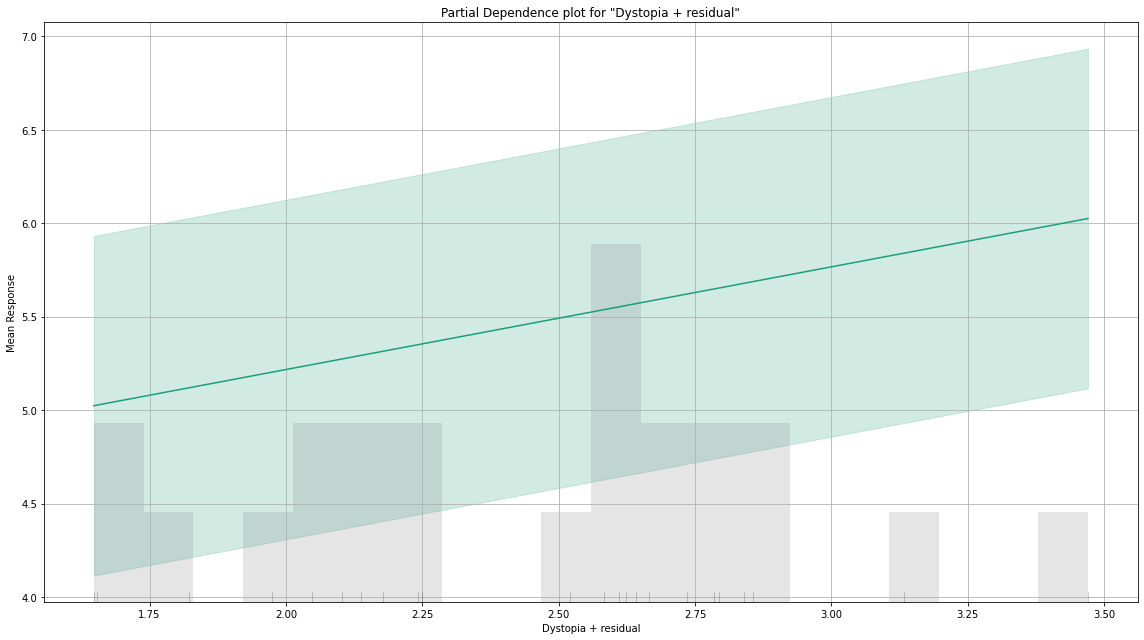

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

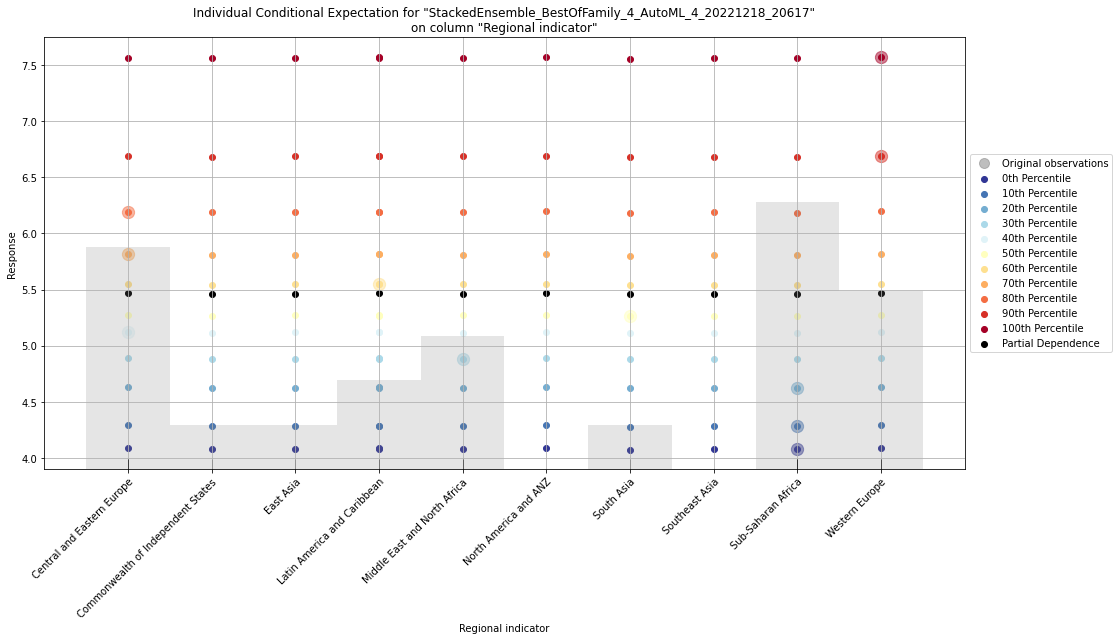

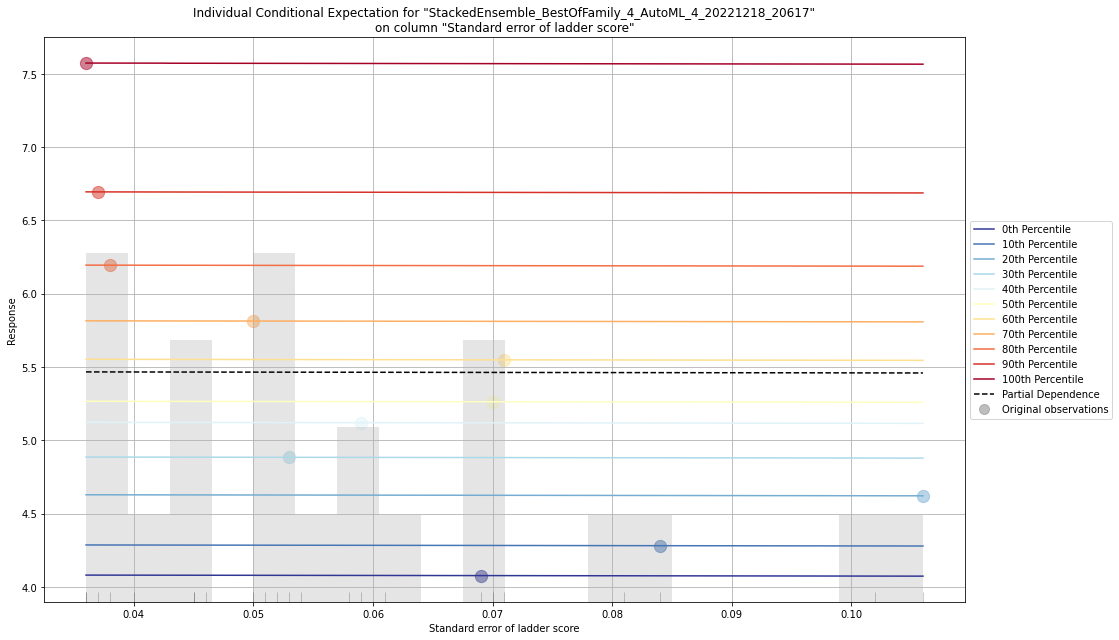

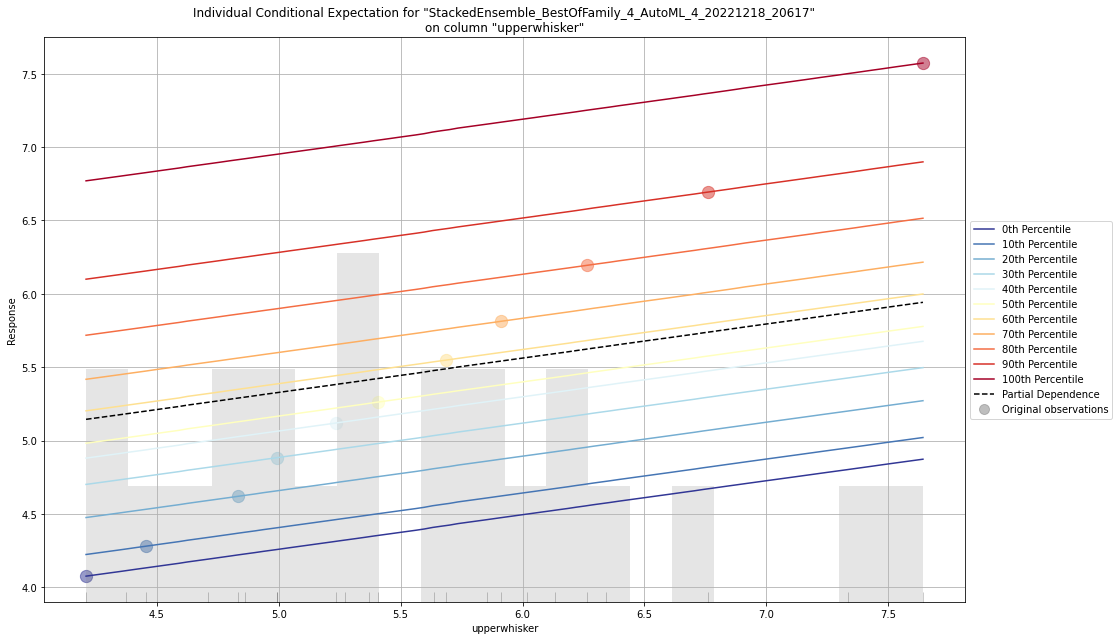

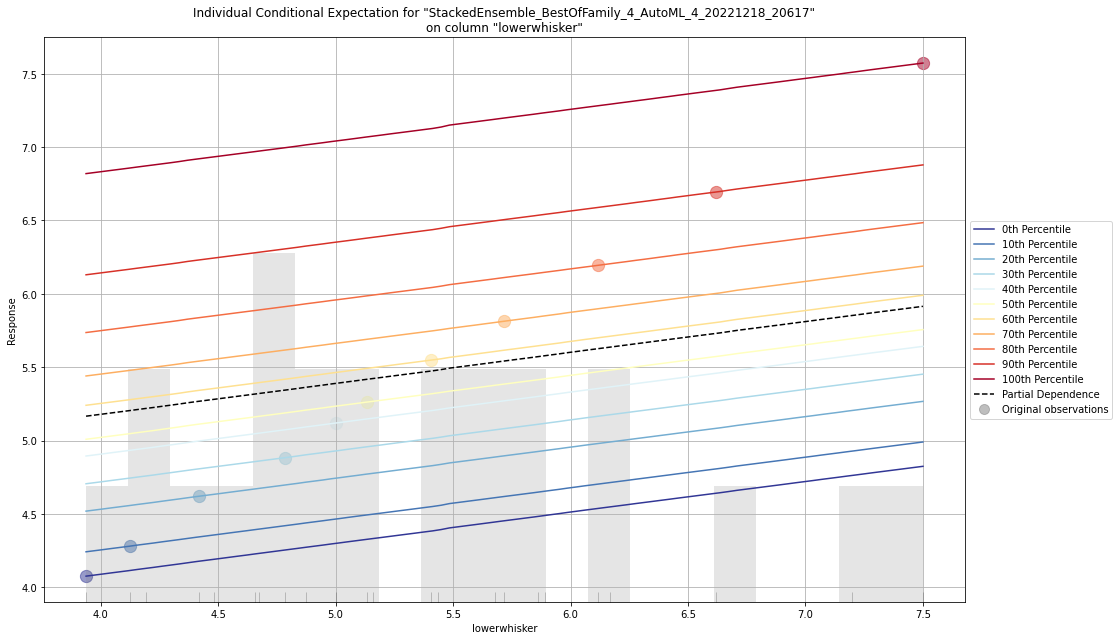

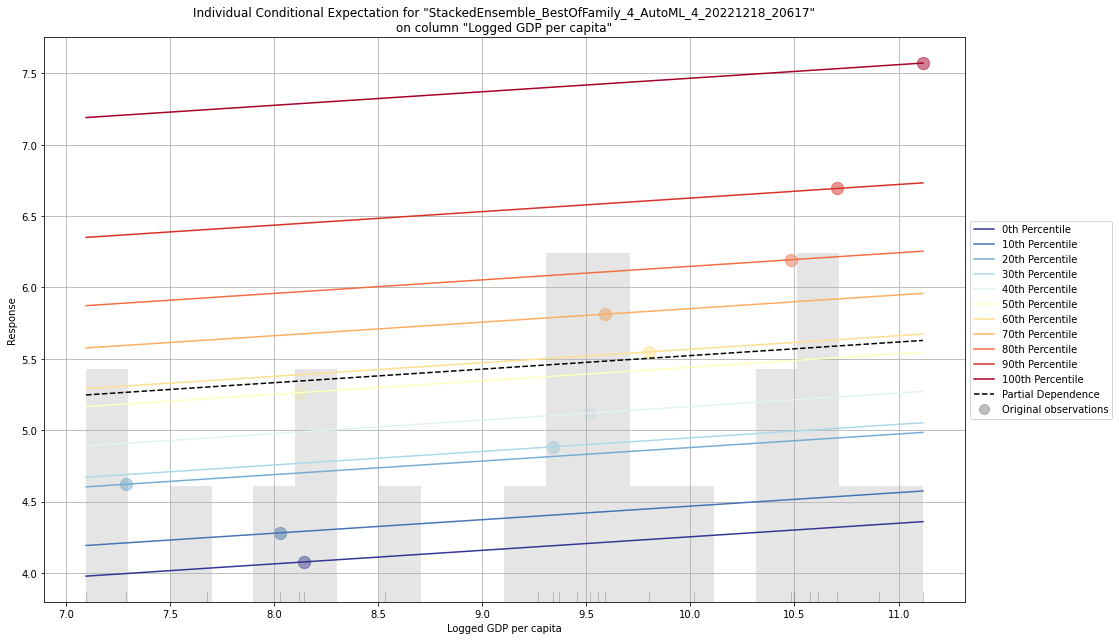

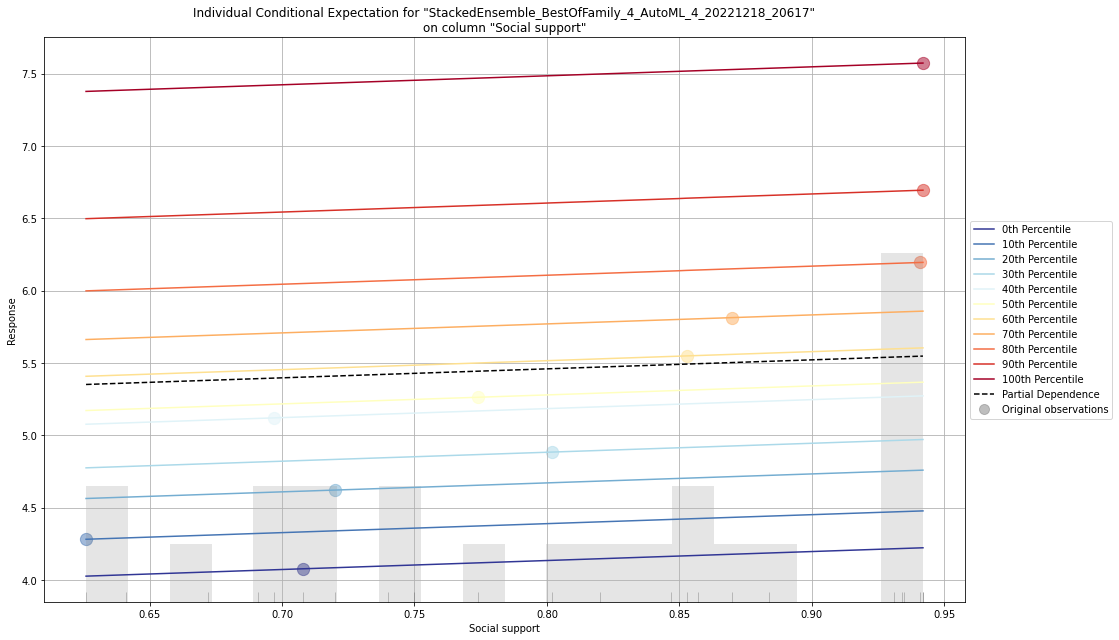

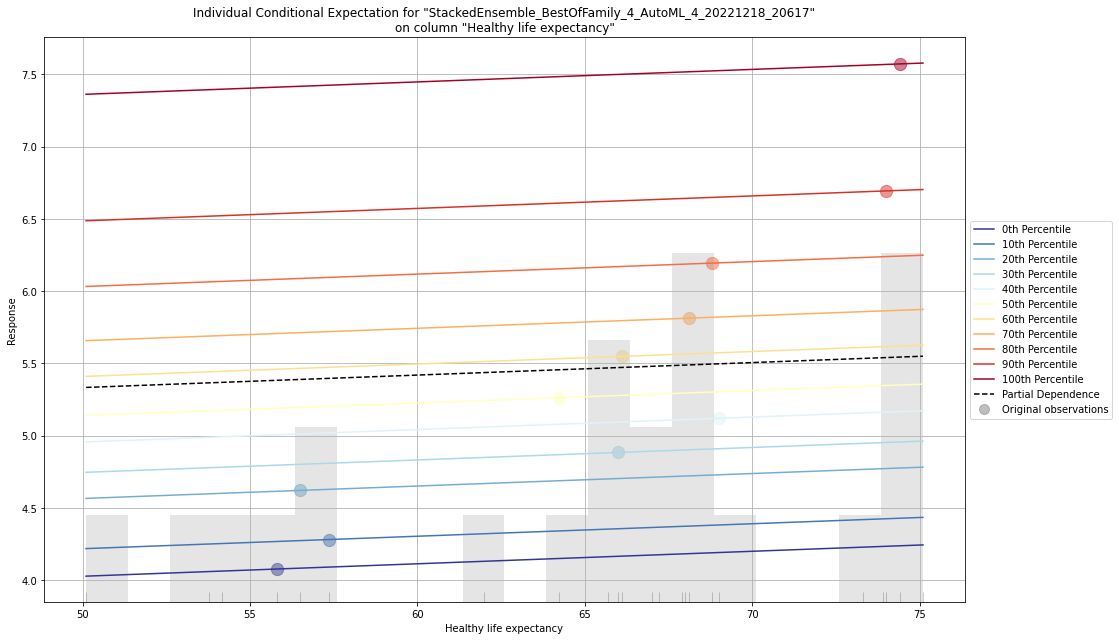

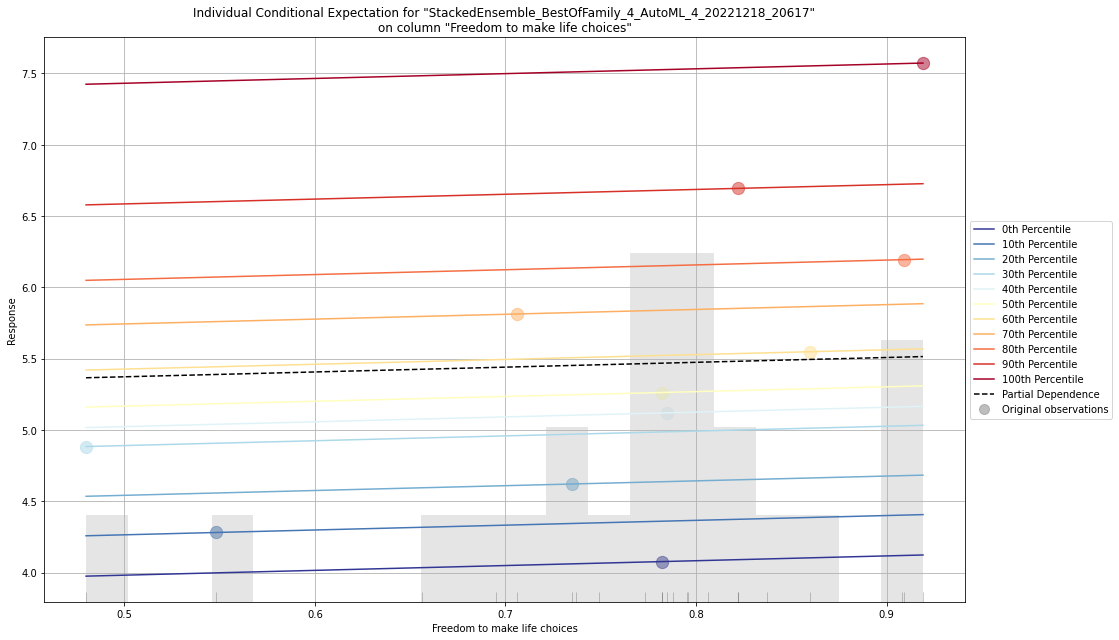

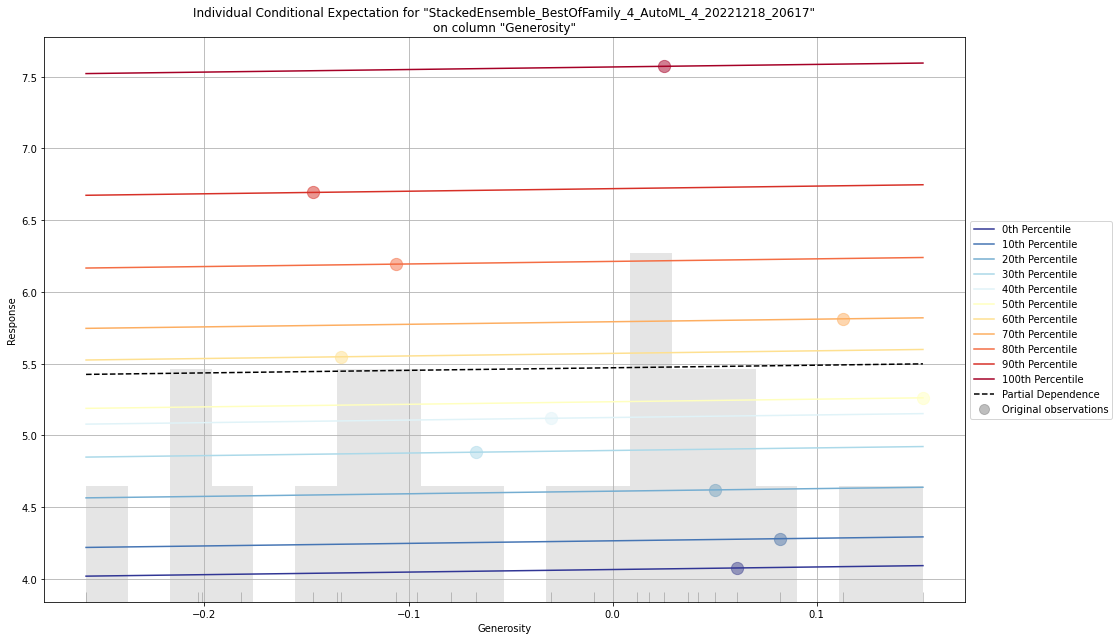

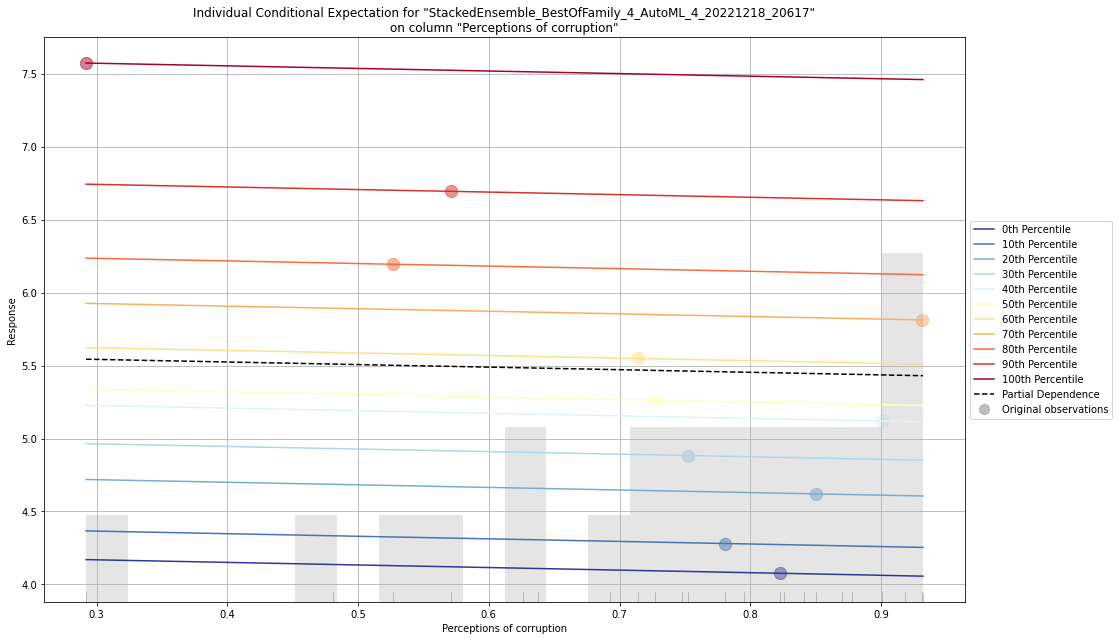

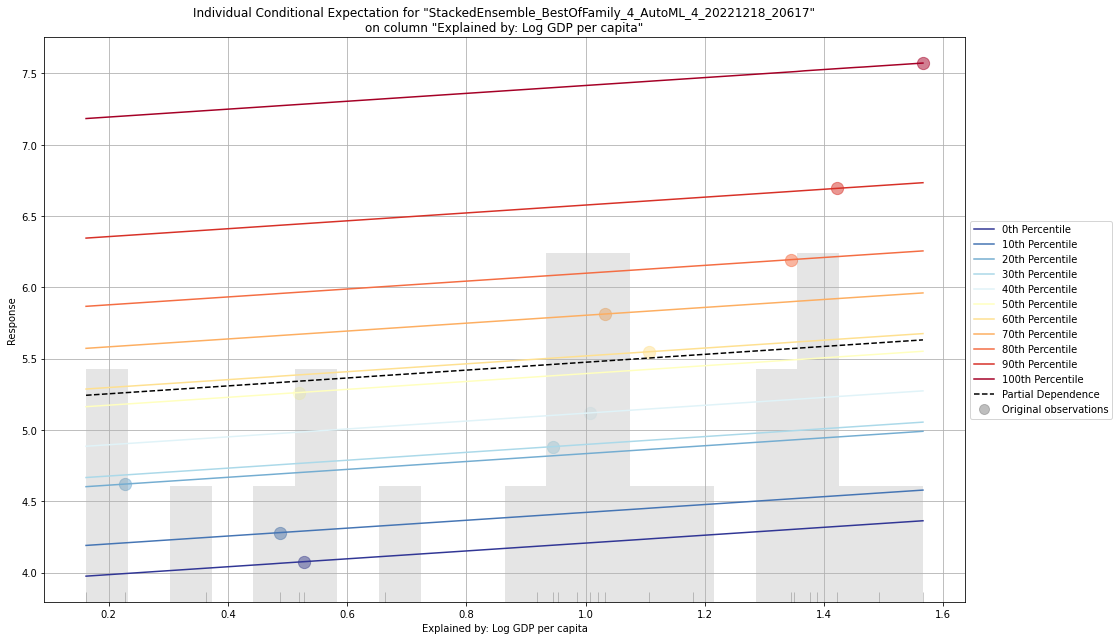

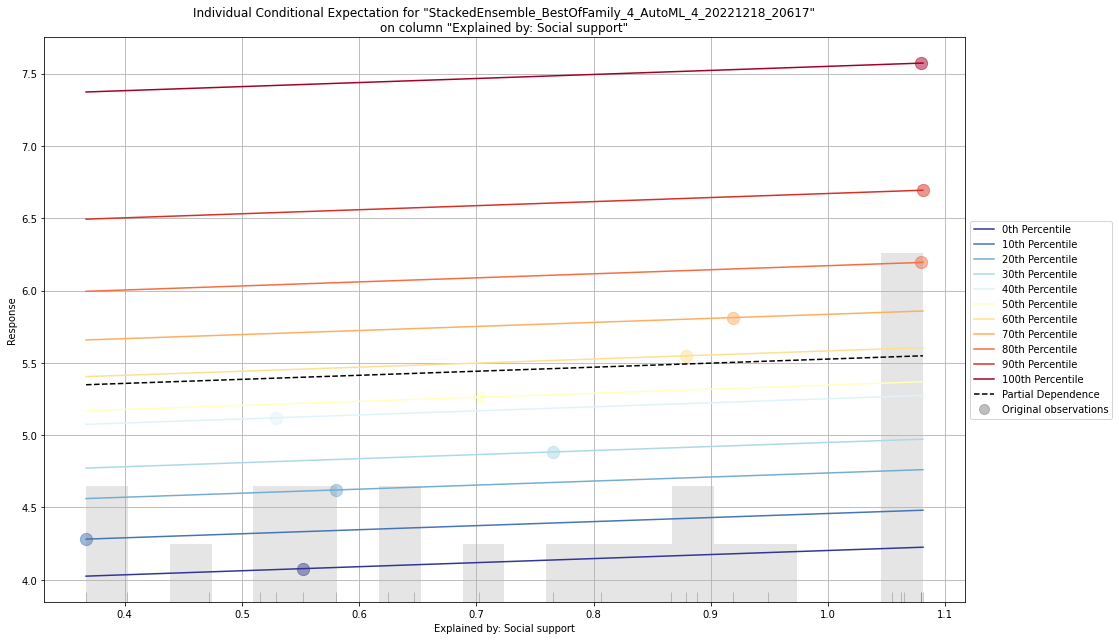

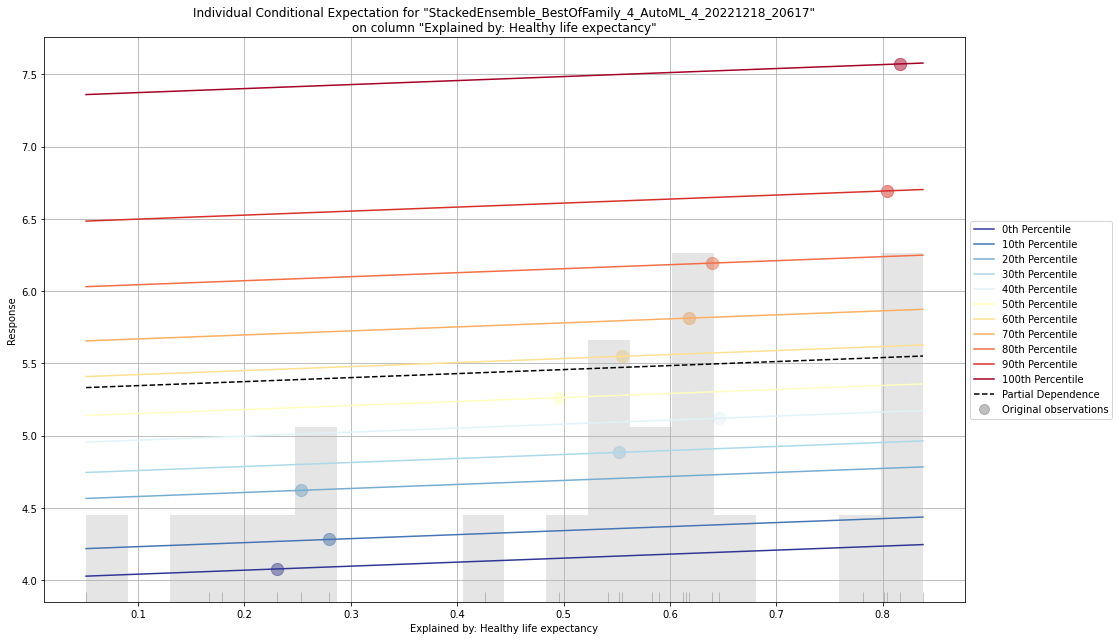

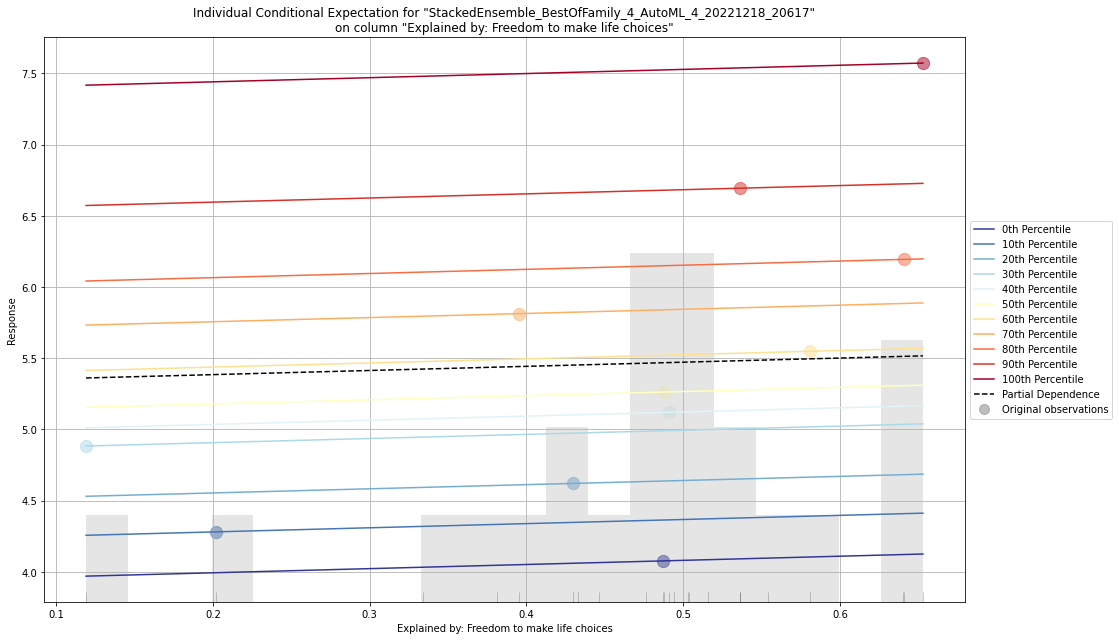

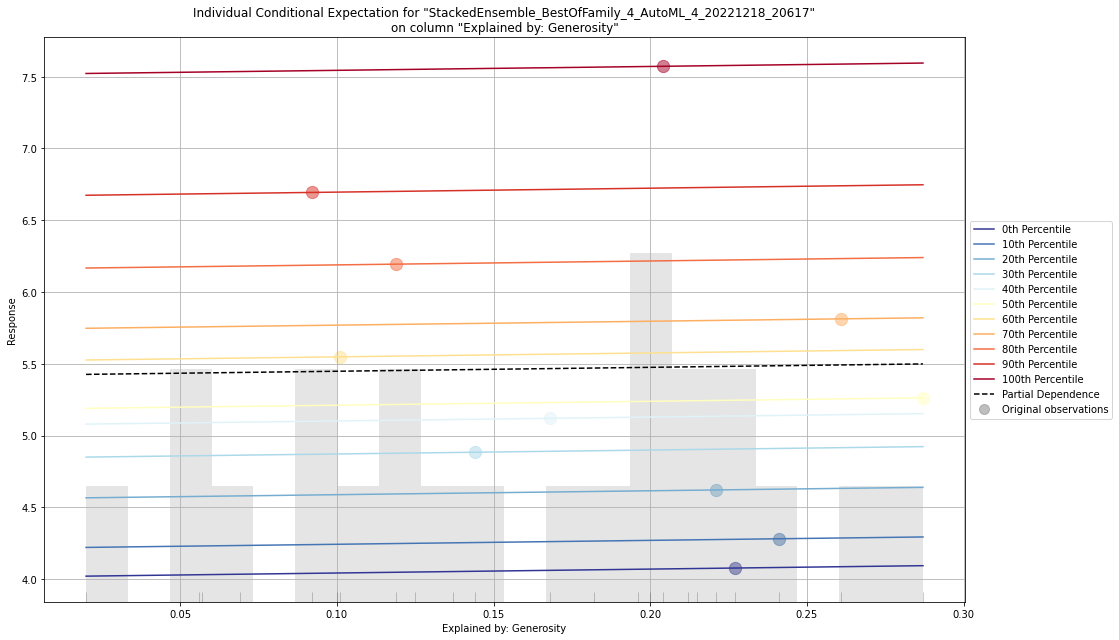

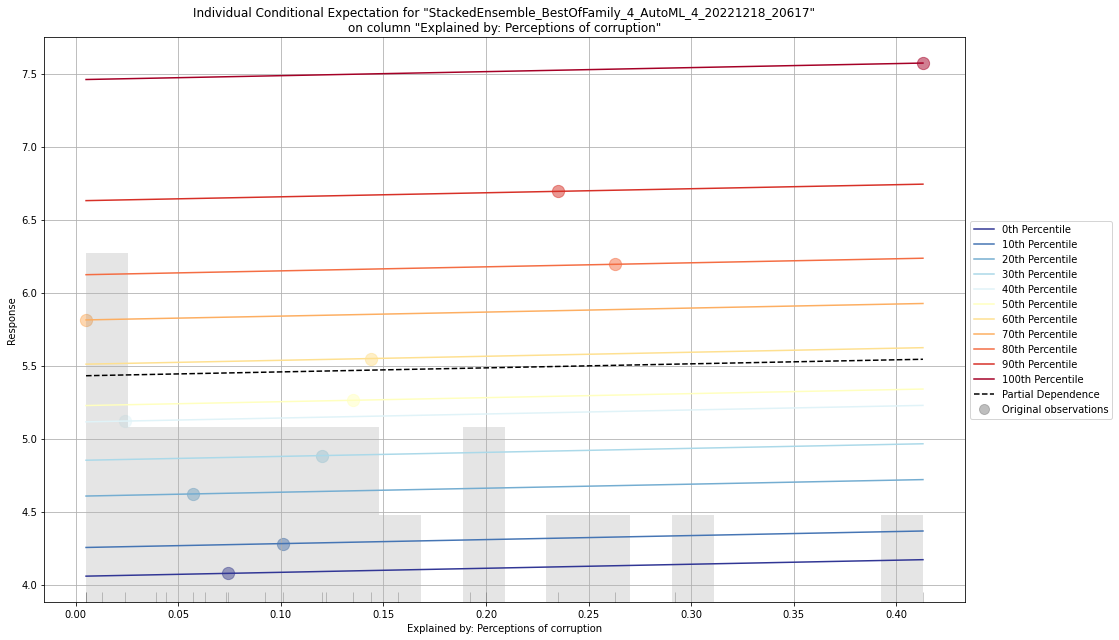

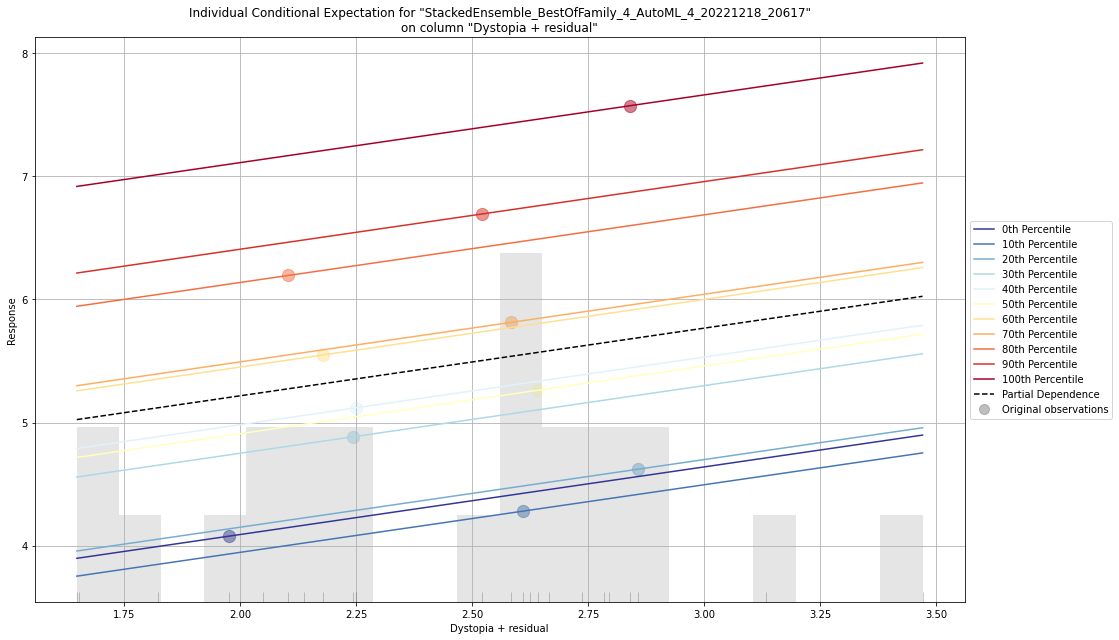

In [63]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import dataset
df = h2o.import_file('/content/drive/MyDrive/Final_portfolio_piece/world-happiness-report-2021.csv') # import file from drive as h2O needs to restart

# Reponse column
y = "Ladder score"

# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

# Run AutoML for 1 minute
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(y=y, training_frame=train)

# Explain leader model & compare with all AutoML models
exa = aml.explain(test)

# Explain a single H2O model (e.g. leader model from AutoML)
exm = aml.leader.explain(test)


# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                      rmse          mse         mae        rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo               predict
------------------------------------------------------  ----------  -----------  ----------  -----------  ------------------------  ------------------  -------------------------  ---------------  ---------
StackedEnsemble_BestOfFamily_1_AutoML_4_20221218_20617  0.00430081  1.84969e-05  0.00358283  0.000727368               1.84969e-05                 107                   0.094425  StackedEnsemble    7.57005
StackedEnsemble_BestOfFamily_2_AutoML_4_20221218_20617  0.00430081  1.84969e-05  0.00358283  0.000727368               1.84969e-05                 115                   0.091445  StackedEnsemble    7.57005
GLM_1_AutoML_4_20221218_20617                           0.00441748  1.95142e-05  0.00365098  0.000751803               1.95142e-05                  43                   0.011992  GLM                7.56794
StackedEnsemble_BestOfFamily_3_AutoML_4_20221218_20617  0.00457317  2.09139e-05  0.00393333  0.000768749               2.09139e-05                 111                   0.149418  StackedEnsemble    7.57261
StackedEnsemble_BestOfFamily_4_AutoML_4_20221218_20617  0.0046329   2.14637e-05  0.00396979  0.000774466               2.14637e-05                 112                   0.15453   StackedEnsemble    7.57267
GBM_grid_1_AutoML_4_20221218_20617_model_2              0.0361599   0.00130754   0.0283323   0.00556849                0.00130754                  236                   0.028473  GBM                7.47346
GBM_grid_1_AutoML_4_20221218_20617_model_12             0.0389868   0.00151997   0.0283784   0.00557348                0.00151997                  281                   0.034136  GBM                7.44957
GBM_4_AutoML_4_20221218_20617                           0.0480749   0.00231119   0.0360924   0.00701963                0.00231119                  255                   0.027281  GBM                7.4219
GBM_2_AutoML_4_20221218_20617                           0.0515379   0.00265616   0.0356606   0.00776361                0.00265616                  340                   0.026288  GBM                7.39978
GBM_5_AutoML_4_20221218_20617                           0.0523401   0.00273948   0.0379794   0.00845736                0.00273948                  426                   0.03678   GBM                7.52281
[20 rows x 10 columns]

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

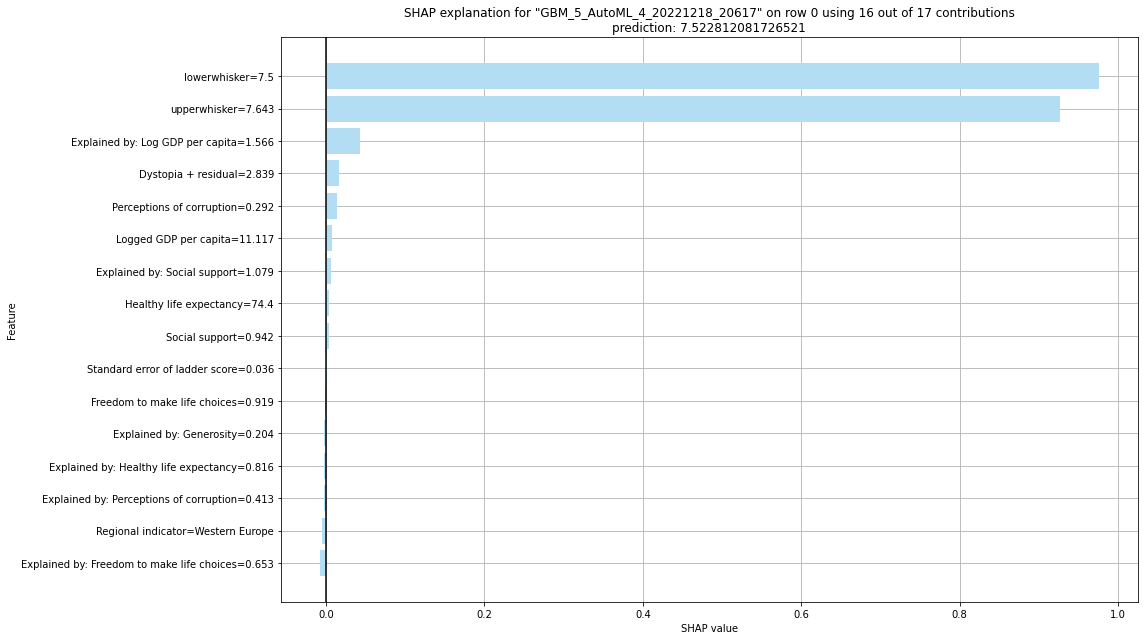

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:3365: UserWarning: No model with variable importance. Selecting all features to explain.
  warnings.warn("No model with variable importance. Selecting all features to explain.")


# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

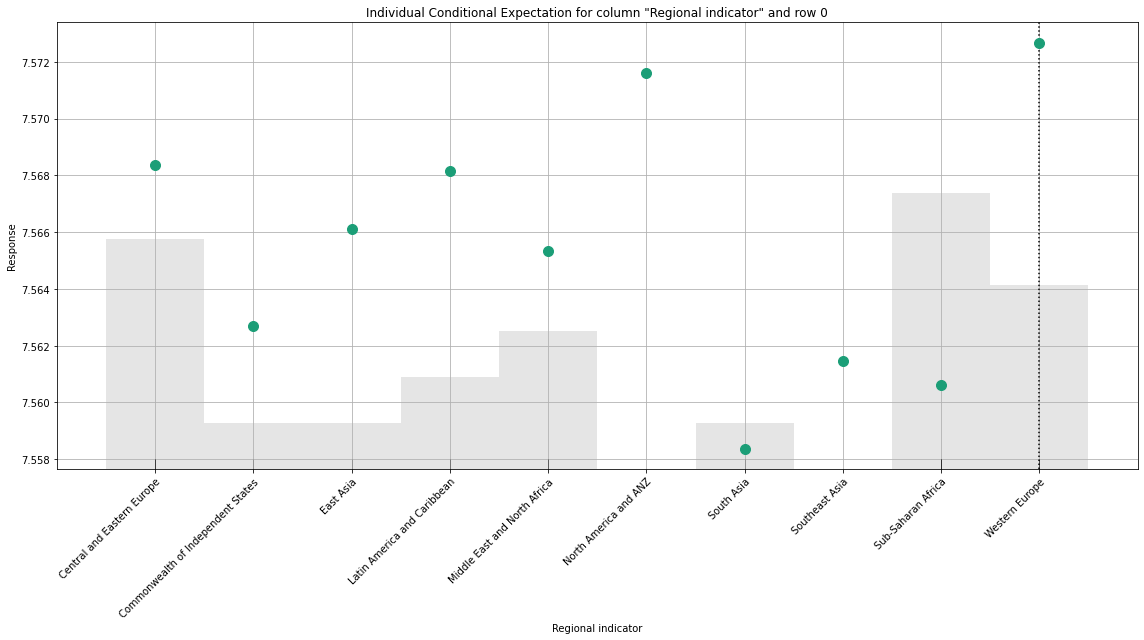

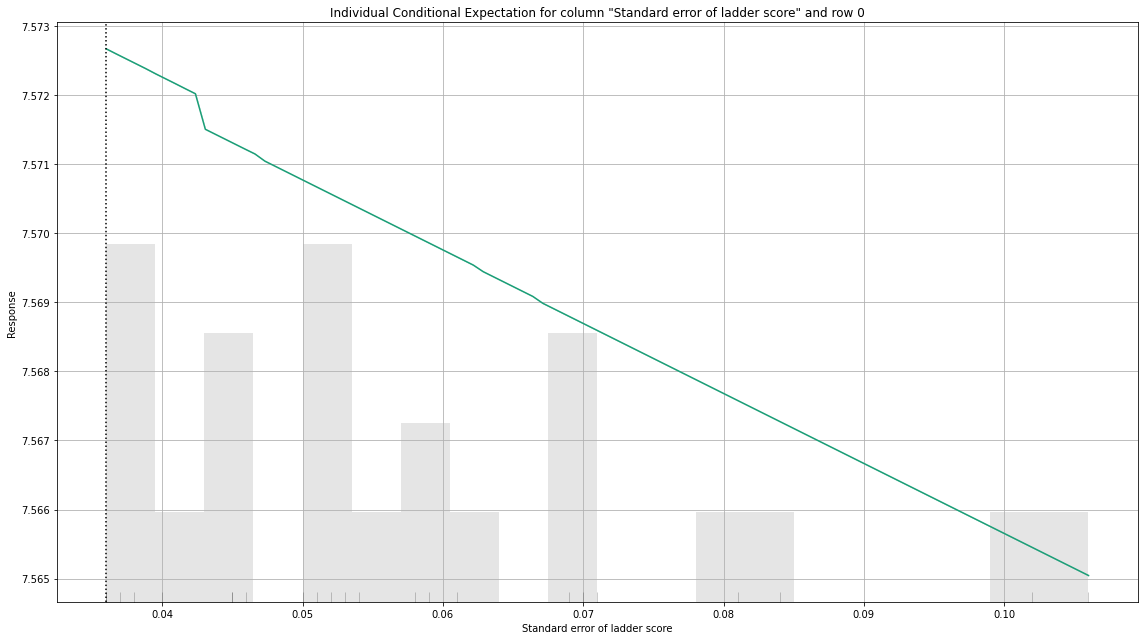

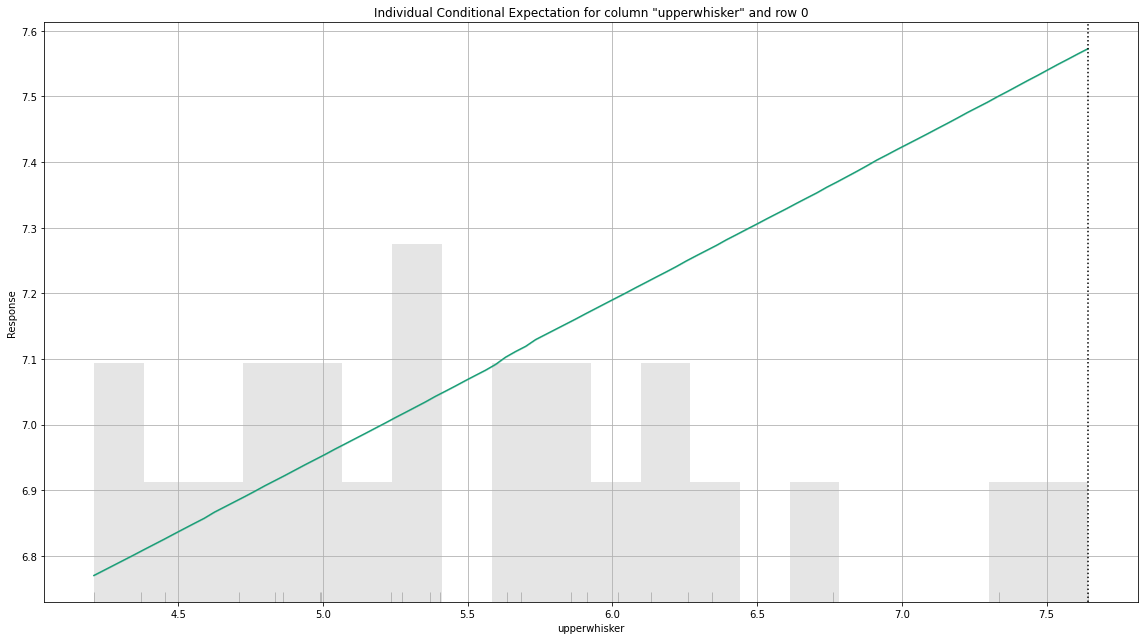

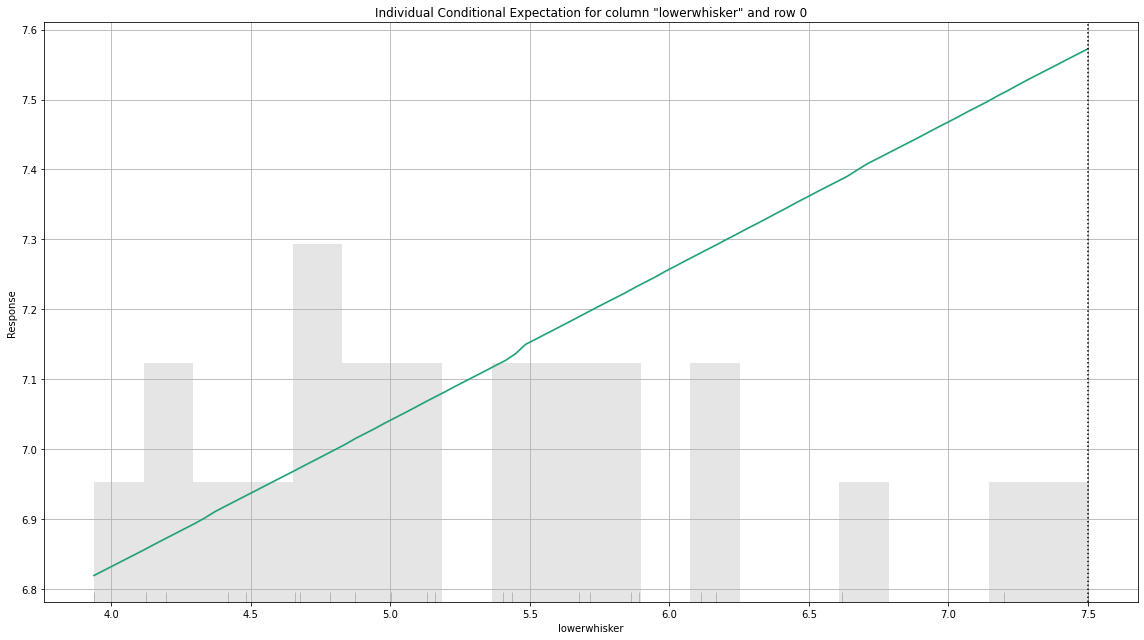

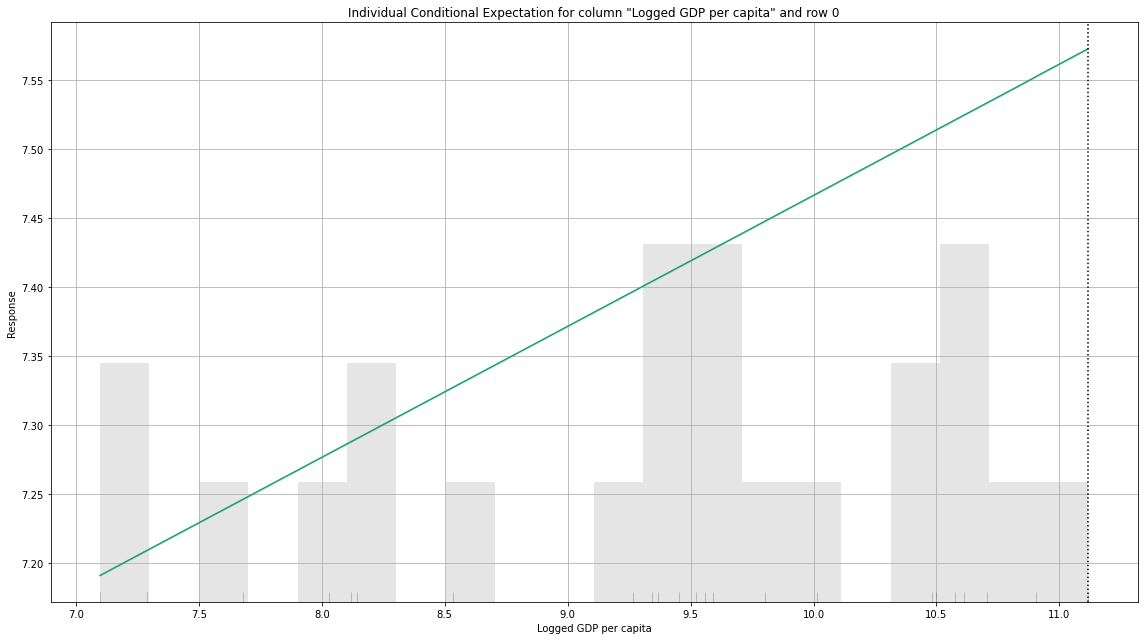

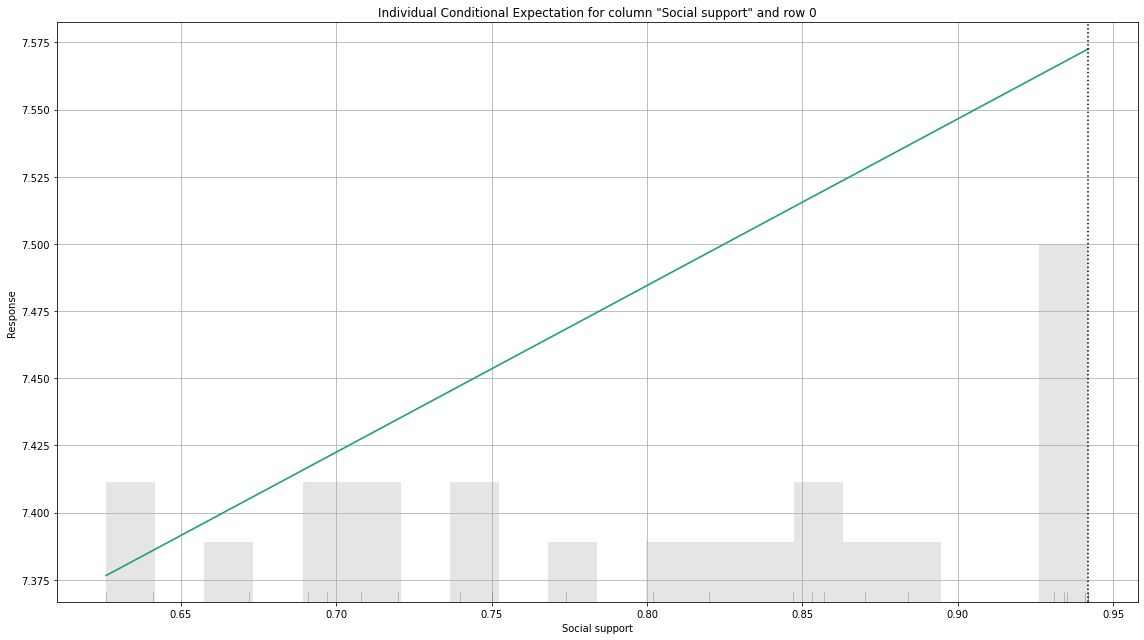

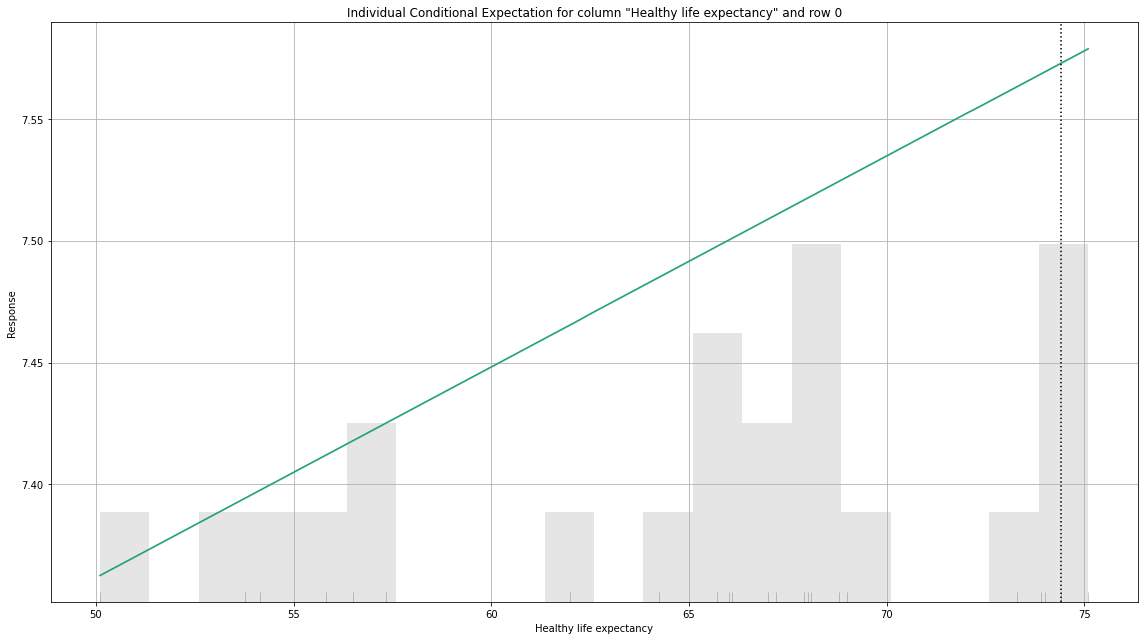

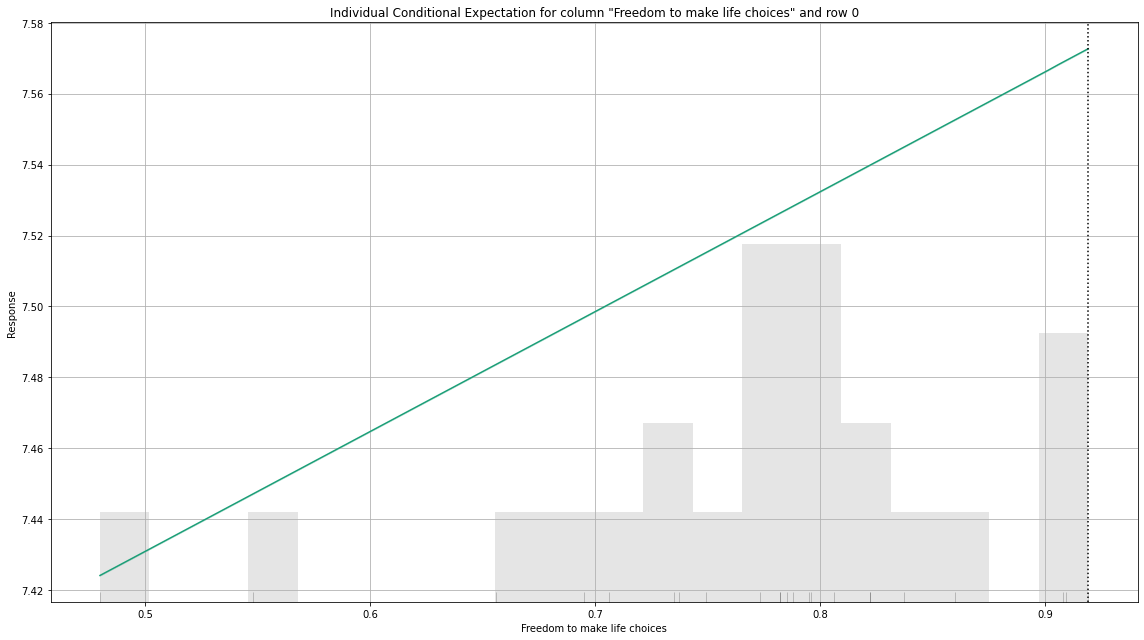

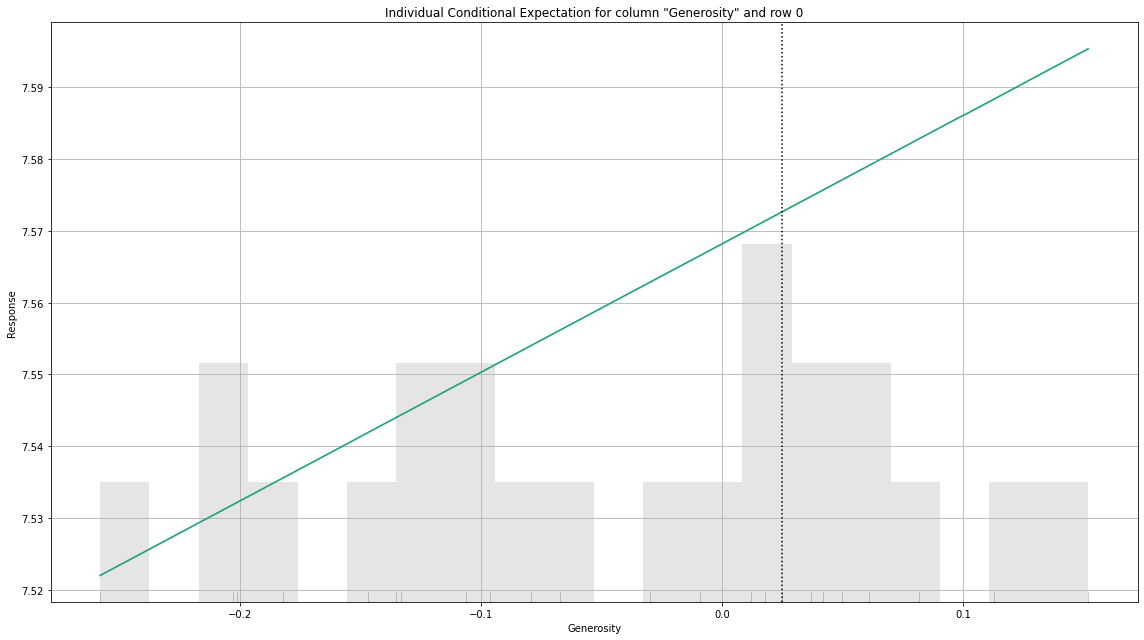

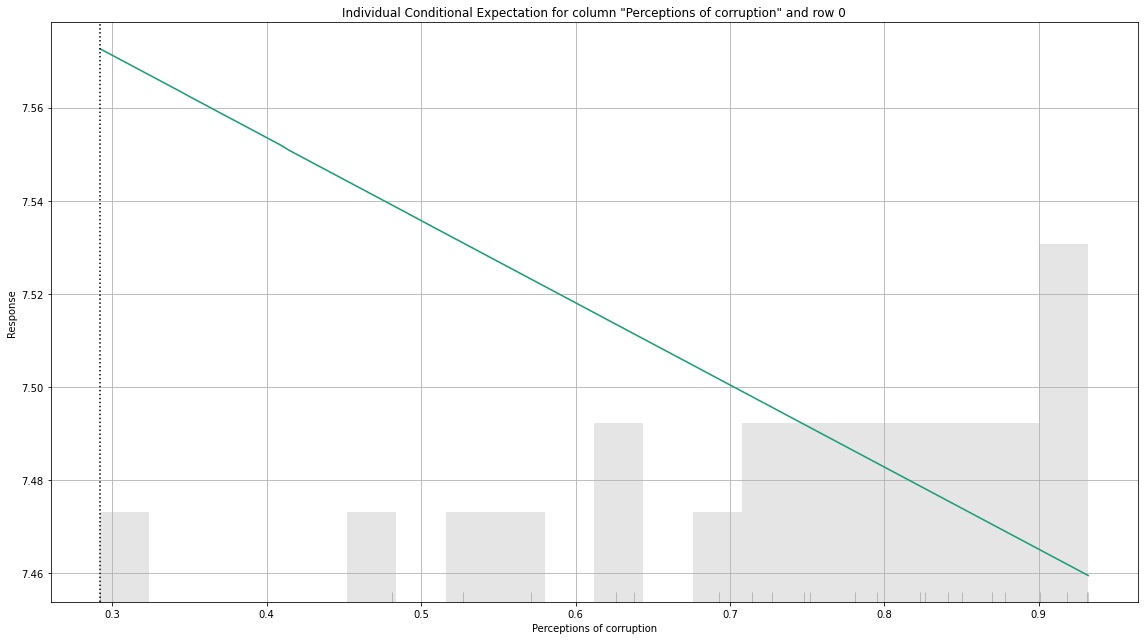

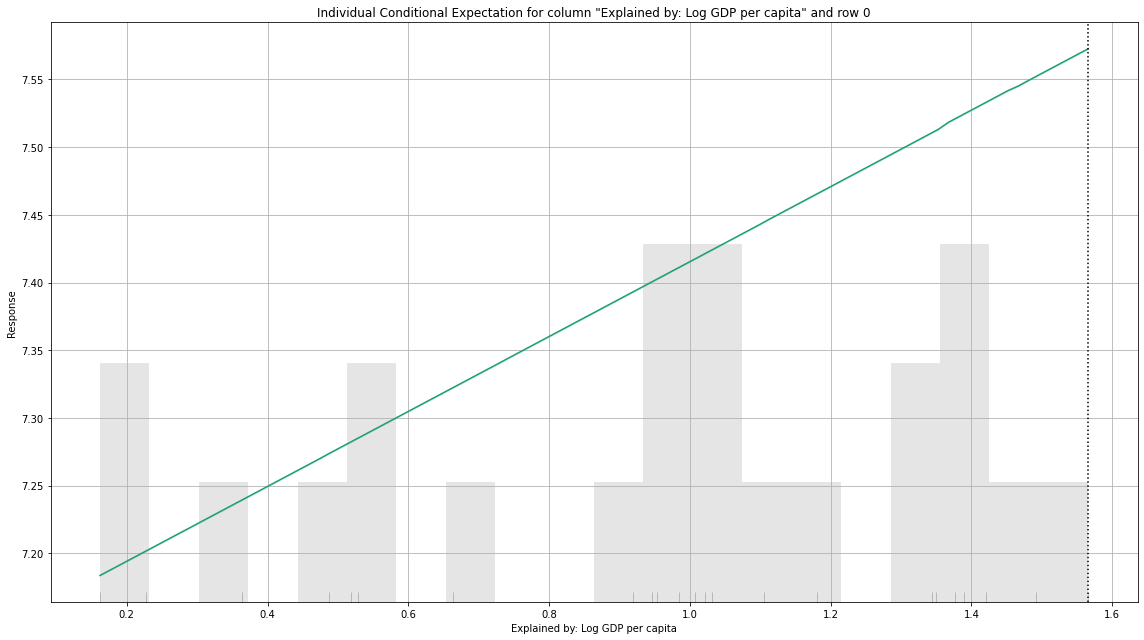

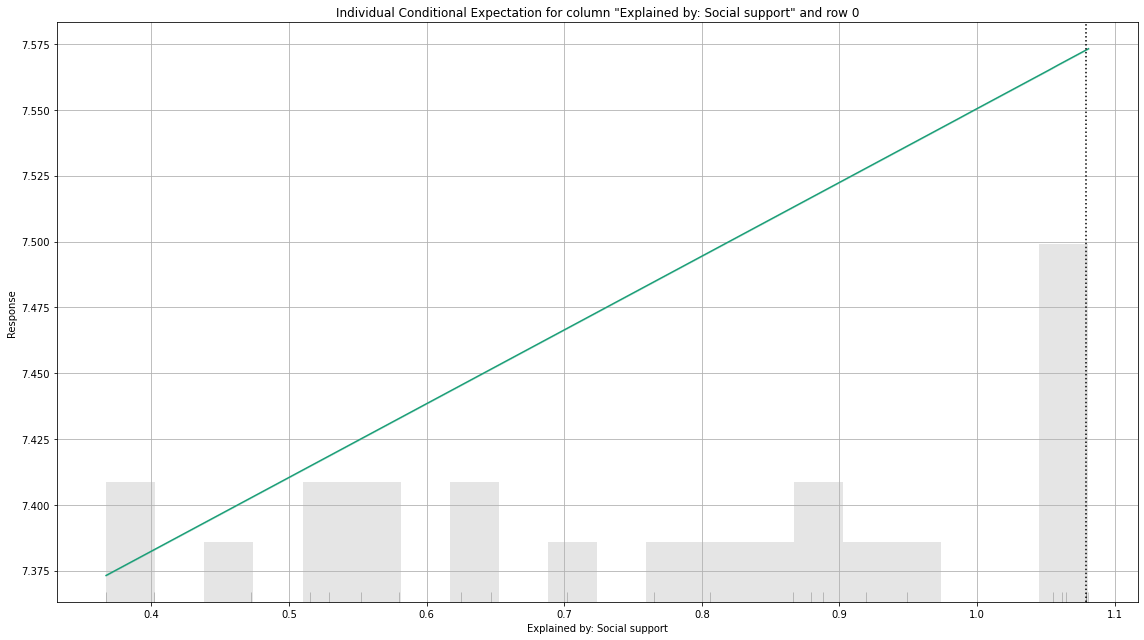

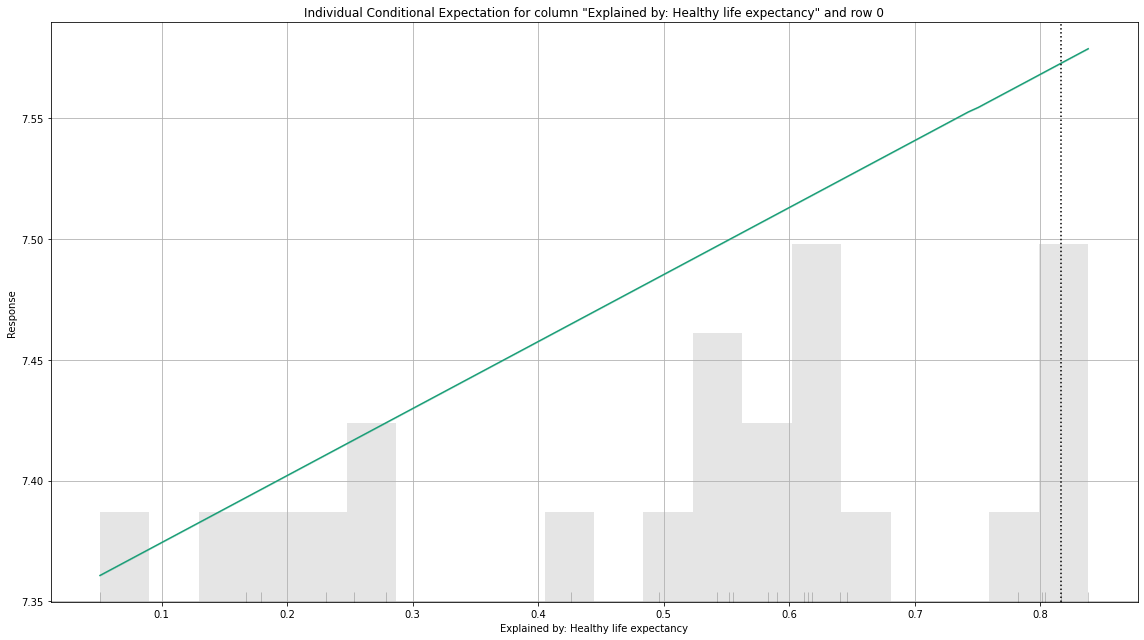

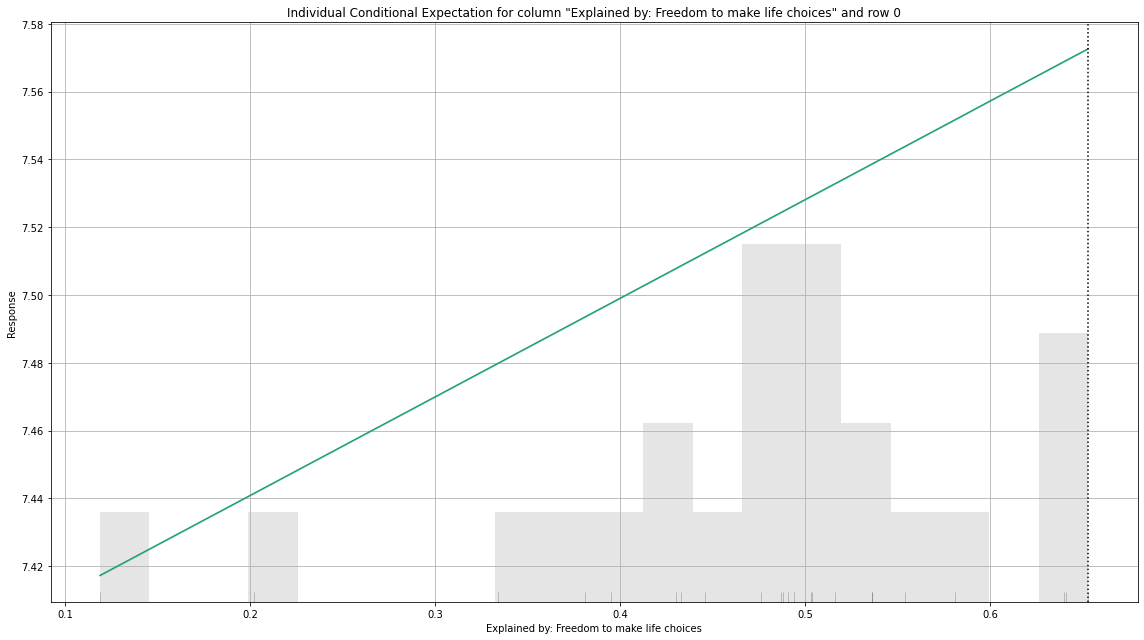

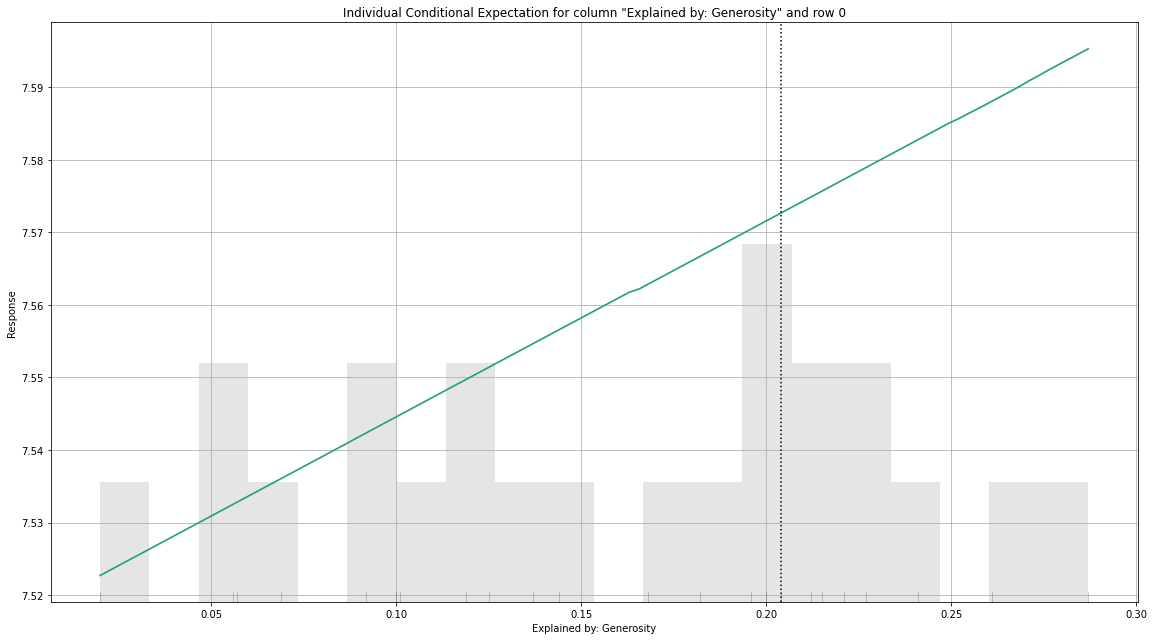

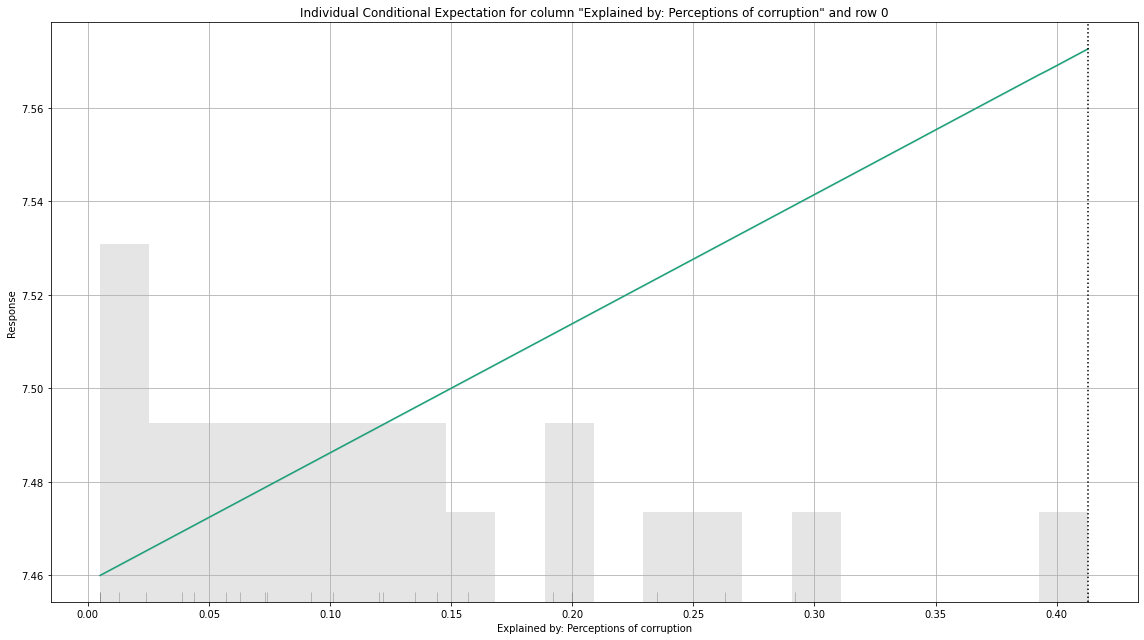

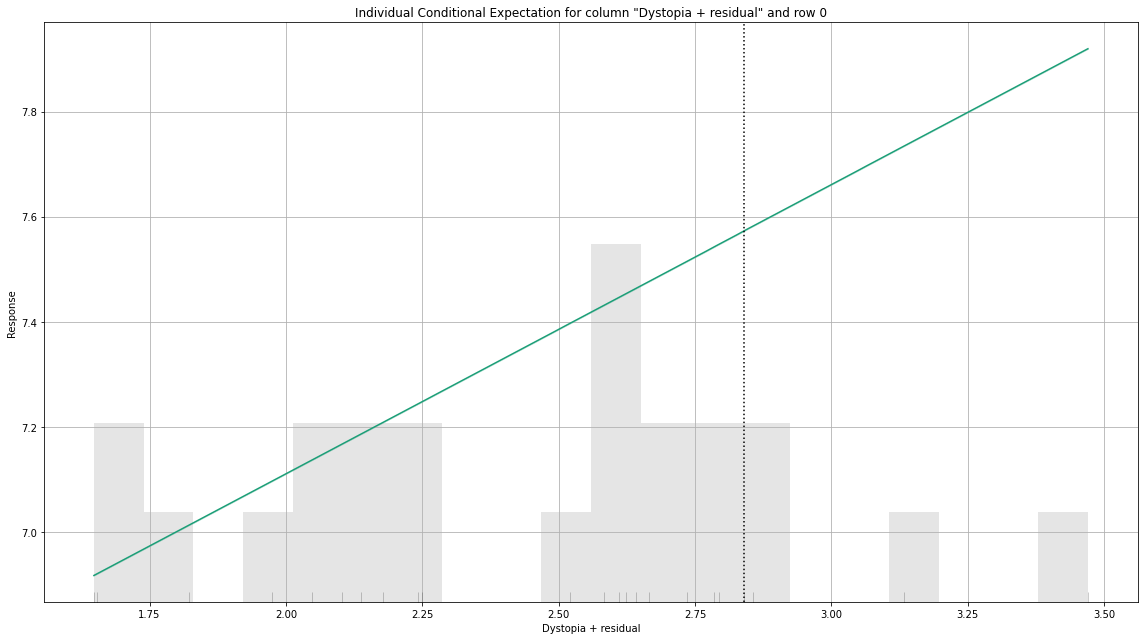

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

In [64]:
# Explain first row with all AutoML models
aml.explain_row(test, row_index=0)

# Explain first row with a single H2O model (e.g. leader model from AutoML)
aml.leader.explain_row(test, row_index=0)

# Explain a generic list of models
# use h2o.explain as follows:
# exl = h2o.explain(model_list, test, row_index=0)

## <font color='blue'>Summary of AutoML - Happiness Index

#### * --> <font color='red'>Is the relationship significant?

##### Yes ! relationship between the models are relevant. For DRF model GDP per capita is the most important independent variable.

#### * --> <font color='red'>Are any model assumptions violated?

##### NO ! all models are valid and thier predictions are more or less the same. 
##### If we check DRF model GDP per capita comes first and Size parameter comes second.

#### *  --><font color='red'>Is there any multicollinearity in the model?

##### If we take DRF model into considartion GDP per capita comes first and life expectancy parameter comes second.

#### *  --><font color='red'>In the multivariate models are predictor variables independent of all the other predictor variables?

##### Yes ! GDP per capita, life span and freedom of speech are independent of any other user.

#### *  --><font color='red'>In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

##### GDP per capita are the most significant variables. Type of the apps are excluded.

#### *  --><font color='red'>Does the model make sense?

##### Yes ! Trained model and validated models make complete sense now 
##### As most of the models shows upperwhisker as the most important variable.
##### By looking at the running models we can say that it completly makes sense.


#### *  --><font color='red'>Which hyperparameters are important for happiness ?

##### There are many important hyperparameters but GDP per capita, per capita income, Health are significantly more important.

#### *  --><font color='red'>Coding professionalism?

##### Had refered some you Youtube videos. Most of the code is written by me only the H2O initializing part is refered from videos.

#### * --> <font color='red'>what code is written by me and what is taken from the internet ?

##### Describing the data, dropping ratings and training the data code is written by me. H2O part is refered from below links.

## <font color='blue'>REFERENCE LINKS

####https://www.youtube.com/watch?v=91QljBnvM7s 

#####https://docs.h2o.ai/h2o/latest-stable/h2o-docs/flow.html

#####https://www.geeksforgeeks.org/automl-using-h2o/

#####https://www.worldometers.info/world-population/population-by-country/